<a href="https://colab.research.google.com/github/danort92/Inferential-Statistics-for-Data-Scientists/blob/main/Inferential_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
dati=read.csv("https://raw.githubusercontent.com/danort92/Inferential-Statistics-for-Data-Scientists/main/neonati.csv",sep=",",stringsAsFactors = T)
attach(dati)

View(dati)
#the dataset is characterized by 2500 observations and 10 variables: 
#relative to the mother: Anni.madre (mother's age), N.gravidanze (n° of pregnancies), Fumatrici (smoker/non smoker), Gestazione (gestation);
#relative to the newborn: Peso (weight), Lunghezza (length), Cranio (skull dimension), Sesso (sex)

#Anni.madre,N.gravidanze,Gestazione,Peso,Lunghezza and Cranio are quantitative variables
#Tipo.Parto, Ospedale and Sesso are qualitative variables, 
#Fumatrici is a categorical variable (0:non smoker, 1:smoker)


#the goal of the study is to find a good regression model to predict the weight of a baby knowing paramenters of the mother and the baby itself

summary(dati)
n=nrow(dati)
cv=function(x){
  sd(x)/mean(x)*100
}

install.packages("moments")
library(moments)

The following objects are masked from dati (pos = 3):

    Anni.madre, Cranio, Fumatrici, Gestazione, Lunghezza, N.gravidanze,
    Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 5):

    Anni.madre, Cranio, Fumatrici, Gestazione, Lunghezza, N.gravidanze,
    Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 6):

    Anni.madre, Cranio, Fumatrici, Gestazione, Lunghezza, N.gravidanze,
    Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 8):

    Anni.madre, Cranio, Fumatrici, Gestazione, Lunghezza, N.gravidanze,
    Ospedale, Peso, Sesso, Tipo.parto




Anni.madre,N.gravidanze,Fumatrici,Gestazione,Peso,Lunghezza,Cranio,Tipo.parto,Ospedale,Sesso
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
26,0,0,42,3380,490,325,Nat,osp3,M
21,2,0,39,3150,490,345,Nat,osp1,F
34,3,0,38,3640,500,375,Nat,osp2,M
28,1,0,41,3690,515,365,Nat,osp2,M
20,0,0,38,3700,480,335,Nat,osp3,F
32,0,0,40,3200,495,340,Nat,osp2,F
26,1,0,39,3100,480,345,Nat,osp3,F
25,0,0,40,3580,510,349,Nat,osp1,M
22,1,0,40,3670,500,335,Ces,osp2,F


   Anni.madre     N.gravidanze       Fumatrici        Gestazione   
 Min.   : 0.00   Min.   : 0.0000   Min.   :0.0000   Min.   :25.00  
 1st Qu.:25.00   1st Qu.: 0.0000   1st Qu.:0.0000   1st Qu.:38.00  
 Median :28.00   Median : 1.0000   Median :0.0000   Median :39.00  
 Mean   :28.16   Mean   : 0.9812   Mean   :0.0416   Mean   :38.98  
 3rd Qu.:32.00   3rd Qu.: 1.0000   3rd Qu.:0.0000   3rd Qu.:40.00  
 Max.   :46.00   Max.   :12.0000   Max.   :1.0000   Max.   :43.00  
      Peso        Lunghezza         Cranio    Tipo.parto Ospedale   Sesso   
 Min.   : 830   Min.   :310.0   Min.   :235   Ces: 728   osp1:816   F:1256  
 1st Qu.:2990   1st Qu.:480.0   1st Qu.:330   Nat:1772   osp2:849   M:1244  
 Median :3300   Median :500.0   Median :340              osp3:835           
 Mean   :3284   Mean   :494.7   Mean   :340                                 
 3rd Qu.:3620   3rd Qu.:510.0   3rd Qu.:350                                 
 Max.   :4930   Max.   :565.0   Max.   :390                   

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   25.00   28.00   28.16   32.00   46.00 

The following objects are masked from dati (pos = 3):

    Anni.madre, Cranio, Fumatrici, Gestazione, Lunghezza, N.gravidanze,
    Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 4):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Lunghezza, N.gravidanze, Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 6):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Lunghezza, N.gravidanze, Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 7):

    Anni.madre, Cranio, Fumatrici, Gestazione, Lunghezza, N.gravidanze,
    Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 9):

    Anni.madre, Cranio, Fumatrici, Gestazione, Lunghezza, N.gravidanze,
    Ospedale, Peso, Sesso, Tipo.parto




,ni,fi,Ni,Fi
"[0,25]",777,0.3108,777,0.3108
"(25,28]",553,0.2212,1330,0.5320
"(28,32]",680,0.2720,2010,0.8040
"(32,46]",490,0.1960,2500,1.0000


[1] 18.50252

[1] 0.1512083

[1] -0.1032773

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



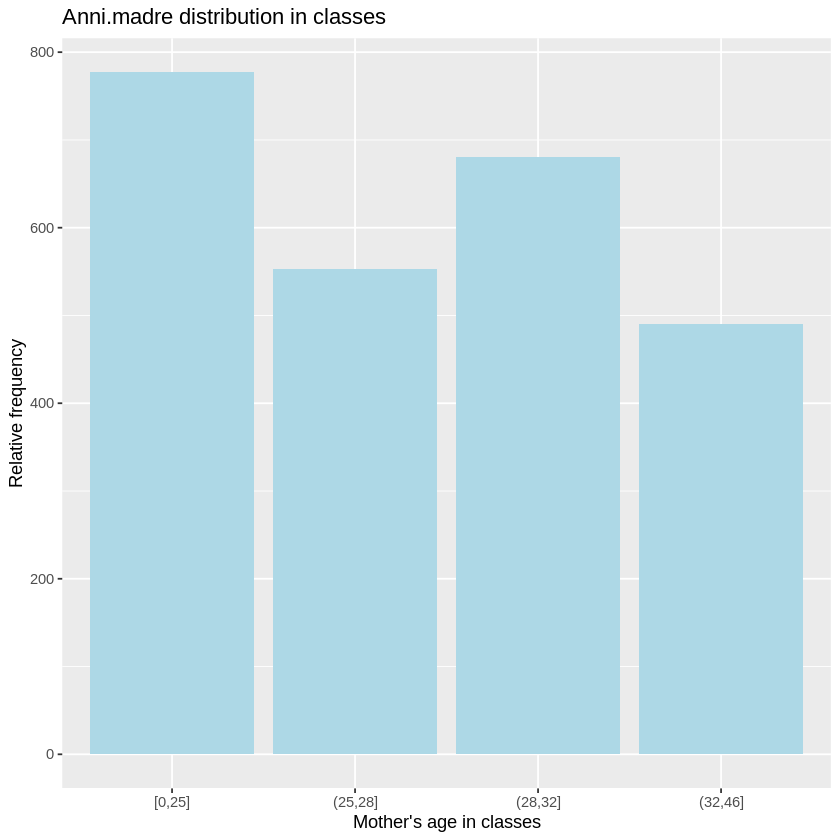

In [10]:
#let's analyse the form indices to have an idea of variables' distributions:

summary(Anni.madre)
dati["Anni.madre"][dati["Anni.madre"]==0]=28
dati["Anni.madre"][dati["Anni.madre"]==1]=28
#the minimum value is 0, the observation should be dropped or the value substituted with the mean or median.
#there are values equal to 0 and 1 inside the dataframe: they get substituted with the median, which is a "robust" parameter, not influenced by anomalies.

dati$Anni.madre_cl=cut(Anni.madre,breaks=quantile(Anni.madre),include.lowest = T)
attach(dati)
ni=table(Anni.madre_cl)
fi=ni/n
Ni=cumsum(ni)
Fi=Ni/n
cbind(ni,fi,Ni,Fi)
cv(Anni.madre)
skewness(Anni.madre)
kurtosis(Anni.madre)-3
install.packages("ggplot2")
library(ggplot2)
ggplot()+
  geom_bar(aes(x=Anni.madre_cl),fill="lightblue")+
  labs(title="Anni.madre distribution in classes",
       x="Mother's age in classes",
       y="Relative frequency")
#from the distibution a much lower frequency after 35 years can be seen (geriatric pregnancies, risky and with more probability to spontaneous abortions)

#fisher asimmetry index is slightly positive, nearly 0: low positive asimmetry (more young mothers)
#kurtosis index >0: leptokurtic distribution

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.9812  1.0000 12.0000 

The following objects are masked from dati (pos = 3):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Lunghezza, N.gravidanze, Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 4):

    Anni.madre, Cranio, Fumatrici, Gestazione, Lunghezza, N.gravidanze,
    Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 5):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Lunghezza, N.gravidanze, N.gravidanze_cl, Ospedale, Peso, Sesso,
    Tipo.parto


The following objects are masked from dati (pos = 7):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Lunghezza, N.gravidanze, Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 8):

    Anni.madre, Cranio, Fumatrici, Gestazione, Lunghezza, N.gravidanze,
    Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 10):

    Anni.madre, Cranio, Fumatrici, Gestazio

,ni,fi,Ni,Fi
"[0,1)",1096,0.4384,1096,0.4384
"[1,2)",818,0.3272,1914,0.7656
"[2,4)",490,0.1960,2404,0.9616
"[4,13)",96,0.0384,2500,1.0000


[1] 130.5123

[1] 2.514254

[1] 10.98941

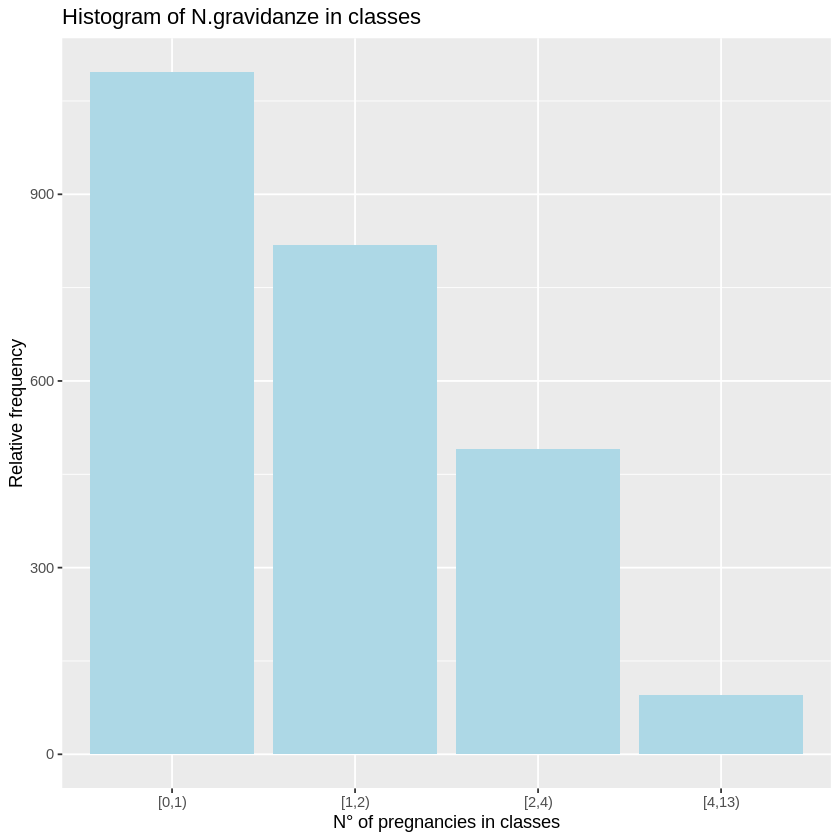

In [11]:
summary(N.gravidanze)
dati$N.gravidanze_cl=cut(N.gravidanze,breaks=c(0,1,2,4,max(N.gravidanze)+1),right=F)
attach(dati)
ni=table(N.gravidanze_cl)
fi=ni/n
Ni=cumsum(ni)
Fi=Ni/n
cbind(ni,fi,Ni,Fi)
cv(N.gravidanze)
skewness(N.gravidanze)
kurtosis(N.gravidanze)-3
ggplot()+
  geom_bar(aes(x=N.gravidanze_cl),fill="lightblue")+
  labs(title="Histogram of N.gravidanze in classes",
       x="N° of pregnancies in classes",
       y="Relative frequency")
#a very big part of the dataset has 0-1 child

#fisher asymmetry index is >>0: strong positive asymmetry
#kurtosis index >>0: strong leptokurtic distribution

In [12]:
dati=transform(dati,Fumatrici=as.factor(Fumatrici))
table(Fumatrici)
#transformed categorical variable Fumatrici in factor and seen that the vast majority of mothers is non smoker

Fumatrici
   0    1 
2396  104 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.00   38.00   39.00   38.98   40.00   43.00 

The following objects are masked from dati (pos = 3):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Lunghezza, N.gravidanze, N.gravidanze_cl, Ospedale, Peso, Sesso,
    Tipo.parto


The following objects are masked from dati (pos = 4):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Lunghezza, N.gravidanze, Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 5):

    Anni.madre, Cranio, Fumatrici, Gestazione, Lunghezza, N.gravidanze,
    Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 6):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Lunghezza, N.gravidanze, N.gravidanze_cl, Ospedale, Peso, Sesso,
    Tipo.parto


The following objects are masked from dati (pos = 8):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Lunghezza, N.gravidanze, Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 9):

    Anni

,ni,fi,Ni,Fi
"[25,38]",791,0.3164,791,0.3164
"(38,39]",581,0.2324,1372,0.5488
"(39,40]",741,0.2964,2113,0.8452
"(40,43]",387,0.1548,2500,1.0000


[1] 4.793792

[1] -2.065313

[1] 8.25815

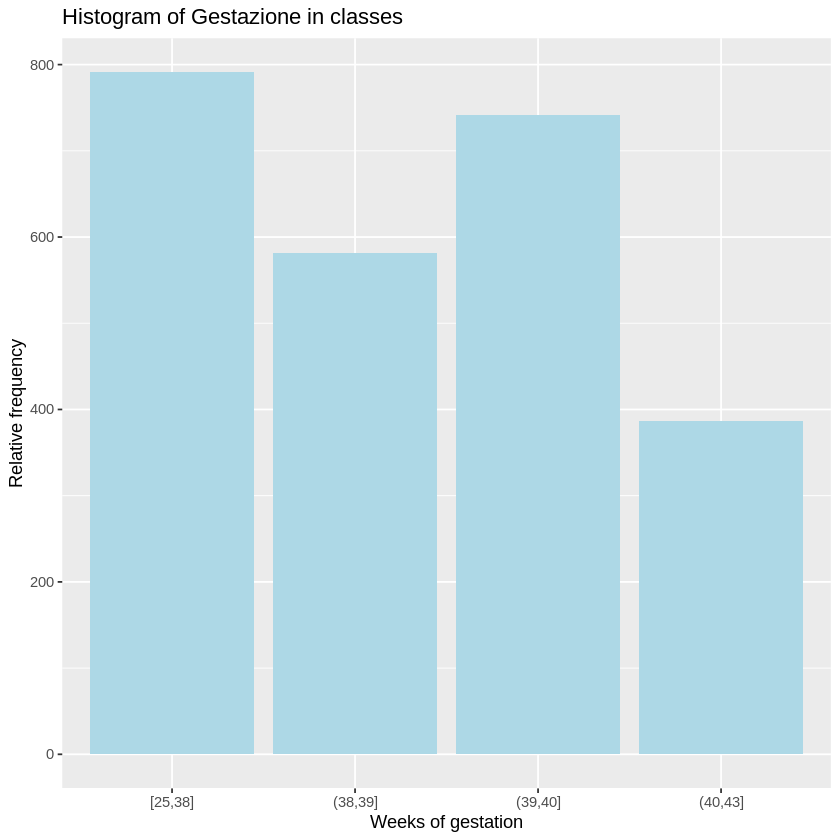

In [13]:
summary(Gestazione)
dati$Gestazione_cl=cut(Gestazione,breaks=quantile(Gestazione),include.lowest = T)
attach(dati)
ni=table(Gestazione_cl)
fi=ni/n
Ni=cumsum(ni)
Fi=Ni/n
cbind(ni,fi,Ni,Fi)
cv(Gestazione)
skewness(Gestazione)
kurtosis(Gestazione)-3
ggplot()+
  geom_bar(aes(x=Gestazione_cl),fill="lightblue")+
  labs(title="Histogram of Gestazione in classes",
       x="Weeks of gestation",
       y="Relative frequency")
#nearly all babies were born after a gestation of 36 weeks (9+ months)
#it's a bit surprising that 387 of them were born between 40 and 43 weeks ( 10 months!)

#fisher asymmetry index is <0: negative asymmetric distribution
#kurtosis index is >0: leptokurtic distribution

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    830    2990    3300    3284    3620    4930 

The following objects are masked from dati (pos = 3):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Gestazione_cl, Lunghezza, N.gravidanze, N.gravidanze_cl, Ospedale,
    Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 4):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Lunghezza, N.gravidanze, N.gravidanze_cl, Ospedale, Peso, Sesso,
    Tipo.parto


The following objects are masked from dati (pos = 5):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Lunghezza, N.gravidanze, Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 6):

    Anni.madre, Cranio, Fumatrici, Gestazione, Lunghezza, N.gravidanze,
    Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 7):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Lunghezza, N.gravidanze, N.gravidanze_cl, Ospedale, Peso, Sesso,
    Tipo.parto


The following objects are m

,ni,fi,Ni,Fi
"[830,2.99e+03]",628,0.2512,628,0.2512
"(2.99e+03,3.3e+03]",670,0.2680,1298,0.5192
"(3.3e+03,3.62e+03]",588,0.2352,1886,0.7544
"(3.62e+03,4.93e+03]",614,0.2456,2500,1.0000


[1] 15.98739

[1] -0.6470308

[1] 2.031532

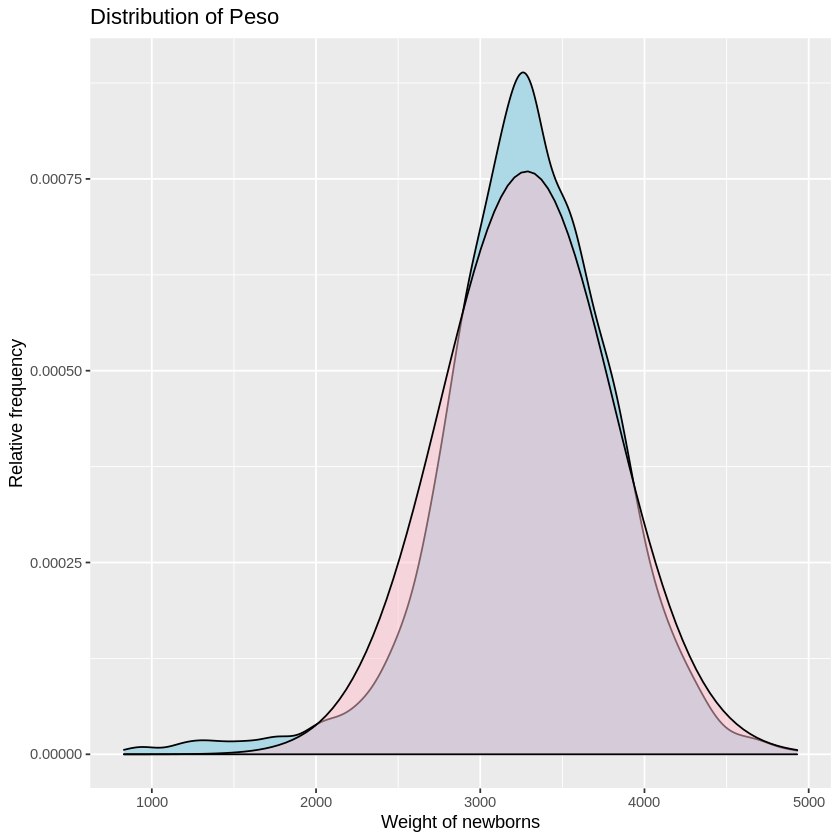

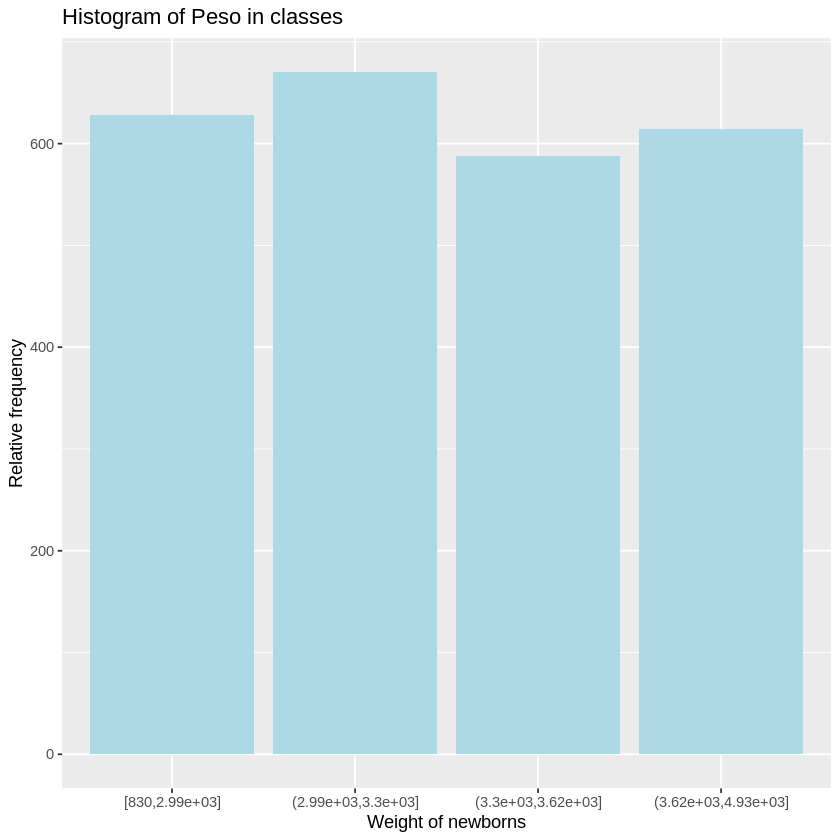

In [14]:
summary(Peso)
dati$Peso_cl=cut(Peso,breaks=quantile(Peso),include.lowest = T)
attach(dati)
ni=table(Peso_cl)
fi=ni/n
Ni=cumsum(ni)
Fi=Ni/n
cbind(ni,fi,Ni,Fi)
cv(Peso)
skewness(Peso)
kurtosis(Peso)-3
ggplot()+
  geom_density(aes(x=Peso),fill="lightblue")+
  labs(title="Distribution of Peso",
       x="Weight of newborns",
       y="Relative frequency")+
  stat_function(fun = ~ dnorm(.x, mean(Peso), sd(Peso)), geom = "area",
                fill = "pink", alpha = 0.5, color = "black")
ggplot()+
  geom_bar(aes(x=Peso_cl),fill="lightblue")+
  labs(title="Histogram of Peso in classes",
       x="Weight of newborns",
       y="Relative frequency")
#newborns' weight has more frequencies above 2.5kg, with the highest observations between 2.5 and 3.5 kg

#fisher asymmetry index is <0: negative asymmetric distribution
#kurtosis index is >0: leptokurtic distribution

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  310.0   480.0   500.0   494.7   510.0   565.0 

The following objects are masked from dati (pos = 3):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Gestazione_cl, Lunghezza, N.gravidanze, N.gravidanze_cl, Ospedale,
    Peso, Peso_cl, Sesso, Tipo.parto


The following objects are masked from dati (pos = 4):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Gestazione_cl, Lunghezza, N.gravidanze, N.gravidanze_cl, Ospedale,
    Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 5):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Lunghezza, N.gravidanze, N.gravidanze_cl, Ospedale, Peso, Sesso,
    Tipo.parto


The following objects are masked from dati (pos = 6):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Lunghezza, N.gravidanze, Ospedale, Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 7):

    Anni.madre, Cranio, Fumatrici, Gestazione, Lunghezza, N.gravidanze,
    Ospedale, Peso, Sesso, Tipo.parto


The

,ni,fi,Ni,Fi
"[310,480]",653,0.2612,653,0.2612
"(480,500]",943,0.3772,1596,0.6384
"(500,510]",392,0.1568,1988,0.7952
"(510,565]",512,0.2048,2500,1.0000


[1] 5.320208

[1] -1.514699

[1] 6.487174

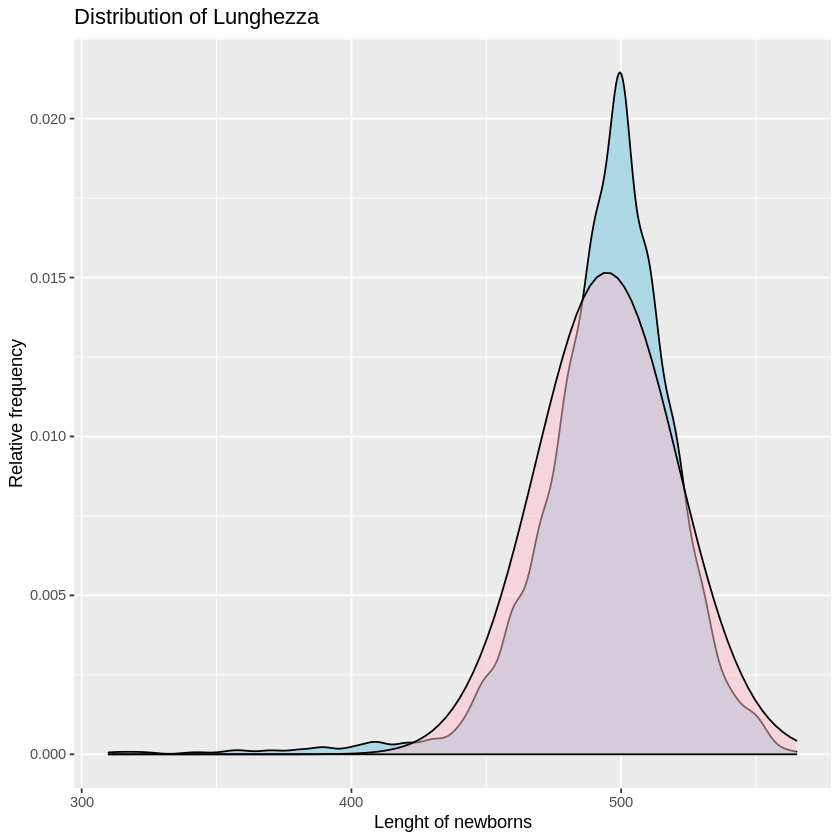

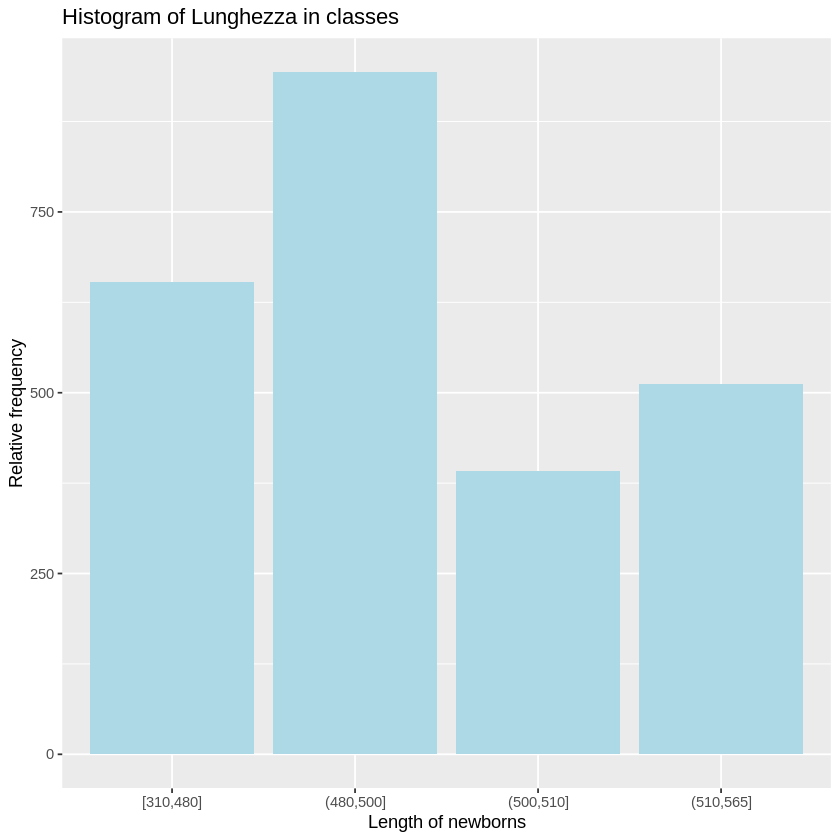

In [15]:
summary(Lunghezza)
dati$Lunghezza_cl=cut(Lunghezza,breaks=quantile(Lunghezza),include.lowest = T)
attach(dati)
ni=table(Lunghezza_cl)
fi=ni/n
Ni=cumsum(ni)
Fi=Ni/n
cbind(ni,fi,Ni,Fi)
cv(Lunghezza)
skewness(Lunghezza)
kurtosis(Lunghezza)-3
ggplot()+
  geom_density(aes(x=Lunghezza),fill="lightblue")+
  labs(title="Distribution of Lunghezza",
       x="Lenght of newborns",
       y="Relative frequency")+
  stat_function(fun = ~ dnorm(.x, mean(Lunghezza), sd(Lunghezza)), geom = "area",
                fill = "pink", alpha = 0.5, color = "black")
ggplot()+
  geom_bar(aes(x=Lunghezza_cl),fill="lightblue")+
  labs(title="Histogram of Lunghezza in classes",
       x="Length of newborns",
       y="Relative frequency")
#the majority of newborns has a skull dimension of 400mm

#fisher asymmetry index is <0: negative asymmetric distribution
#kurtosis index is >0: leptokurtic distribution

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    235     330     340     340     350     390 

The following objects are masked from dati (pos = 3):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Gestazione_cl, Lunghezza, Lunghezza_cl, N.gravidanze,
    N.gravidanze_cl, Ospedale, Peso, Peso_cl, Sesso, Tipo.parto


The following objects are masked from dati (pos = 4):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Gestazione_cl, Lunghezza, N.gravidanze, N.gravidanze_cl, Ospedale,
    Peso, Peso_cl, Sesso, Tipo.parto


The following objects are masked from dati (pos = 5):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Gestazione_cl, Lunghezza, N.gravidanze, N.gravidanze_cl, Ospedale,
    Peso, Sesso, Tipo.parto


The following objects are masked from dati (pos = 6):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestazione,
    Lunghezza, N.gravidanze, N.gravidanze_cl, Ospedale, Peso, Sesso,
    Tipo.parto


The following objects are masked from dati (pos = 7):

    Anni.madre, Anni.madre_cl, Cranio, Fumatrici, Gestaz

,ni,fi,Ni,Fi
"[235,330]",651,0.2604,651,0.2604
"(330,340]",658,0.2632,1309,0.5236
"(340,350]",624,0.2496,1933,0.7732
"(350,390]",567,0.2268,2500,1.0000


[1] 4.830565

[1] -0.7850527

[1] 2.946206

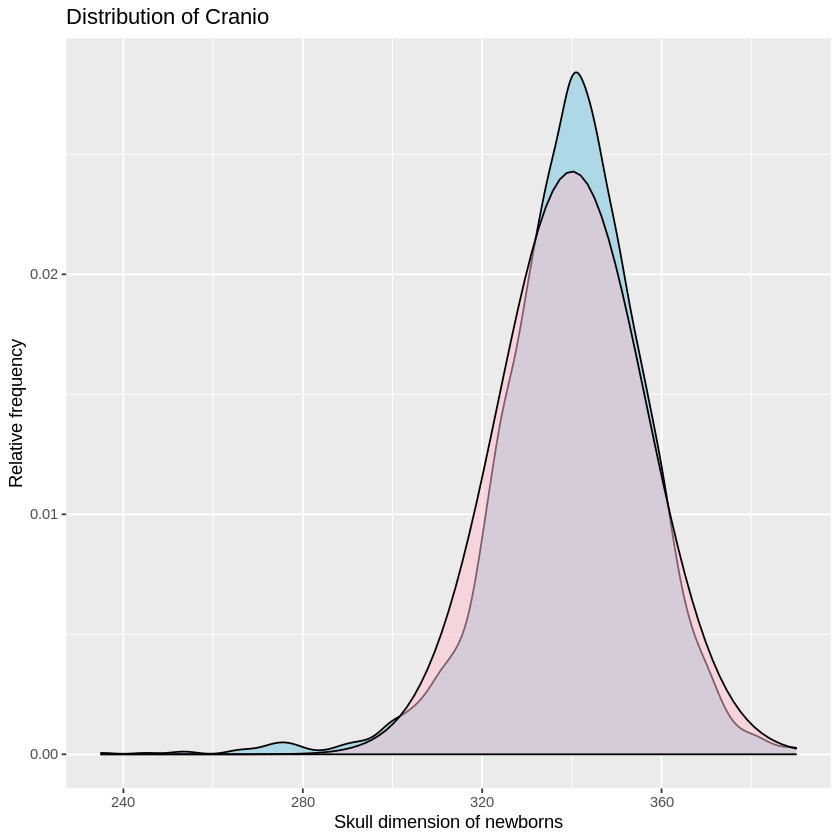

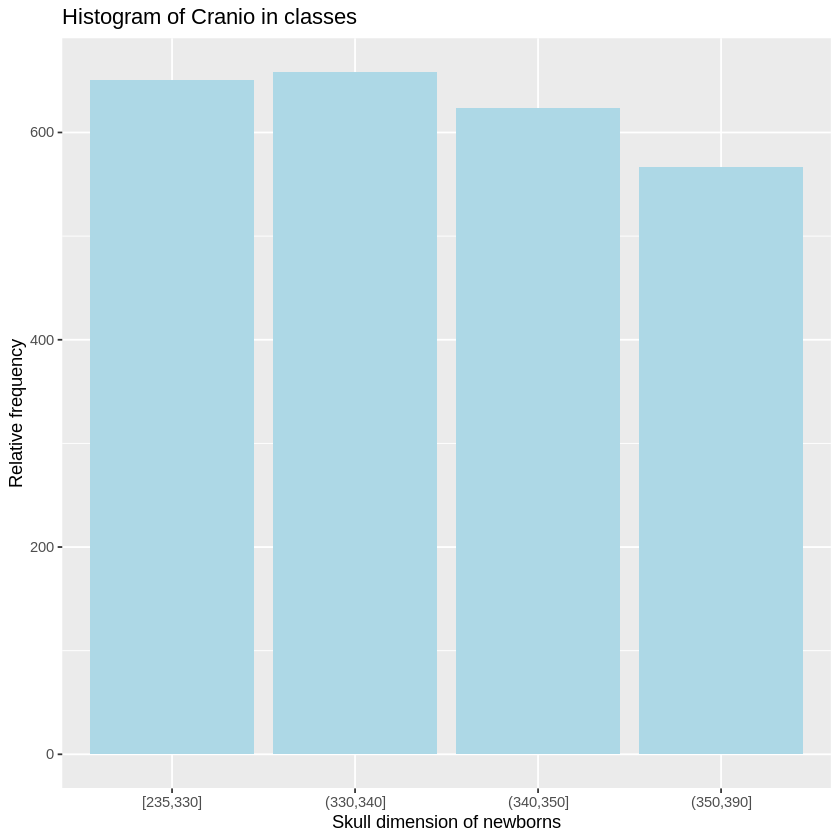

In [16]:
summary(Cranio)
dati$Cranio_cl=cut(Cranio,breaks=quantile(Cranio),include.lowest = T)
attach(dati)
ni=table(Cranio_cl)
fi=ni/n
Ni=cumsum(ni)
Fi=Ni/n
cbind(ni,fi,Ni,Fi)
cv(Cranio)
skewness(Cranio)
kurtosis(Cranio)-3
ggplot()+
  geom_density(aes(x=Cranio),fill="lightblue")+
  labs(title="Distribution of Cranio",
       x="Skull dimension of newborns",
       y="Relative frequency")+
  stat_function(fun = ~ dnorm(.x, mean(Cranio), sd(Cranio)), geom = "area",
                fill = "pink", alpha = 0.5, color = "black")
ggplot()+
  geom_bar(aes(x=Cranio_cl),fill="lightblue")+
  labs(title="Histogram of Cranio in classes",
       x="Skull dimension of newborns",
       y="Relative frequency")
#the majority of newborns has a length of 300mm

#fisher asymmetry index is <0: negative asymmetric distribution
#kurtosis index is >0: leptokurtic distribution


	One Sample t-test

data:  Peso
t = -1.516, df = 2499, p-value = 0.1296
alternative hypothesis: true mean is not equal to 3300
95 percent confidence interval:
 3263.490 3304.672
sample estimates:
mean of x 
 3284.081 



	One Sample t-test

data:  Lunghezza
t = -10.084, df = 2499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 500
95 percent confidence interval:
 493.6598 495.7242
sample estimates:
mean of x 
  494.692 


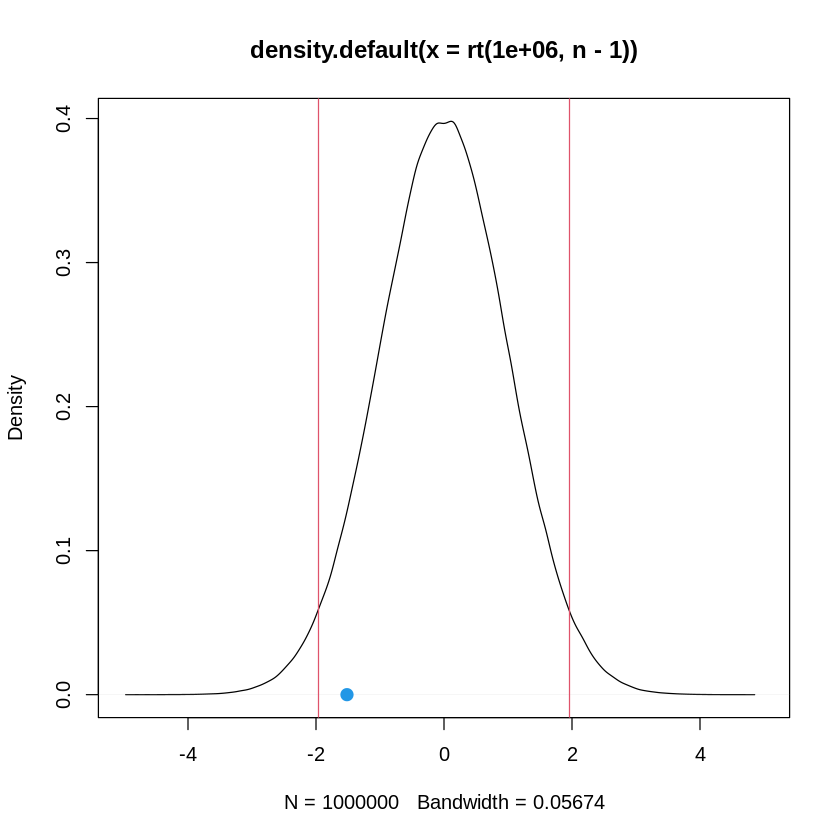

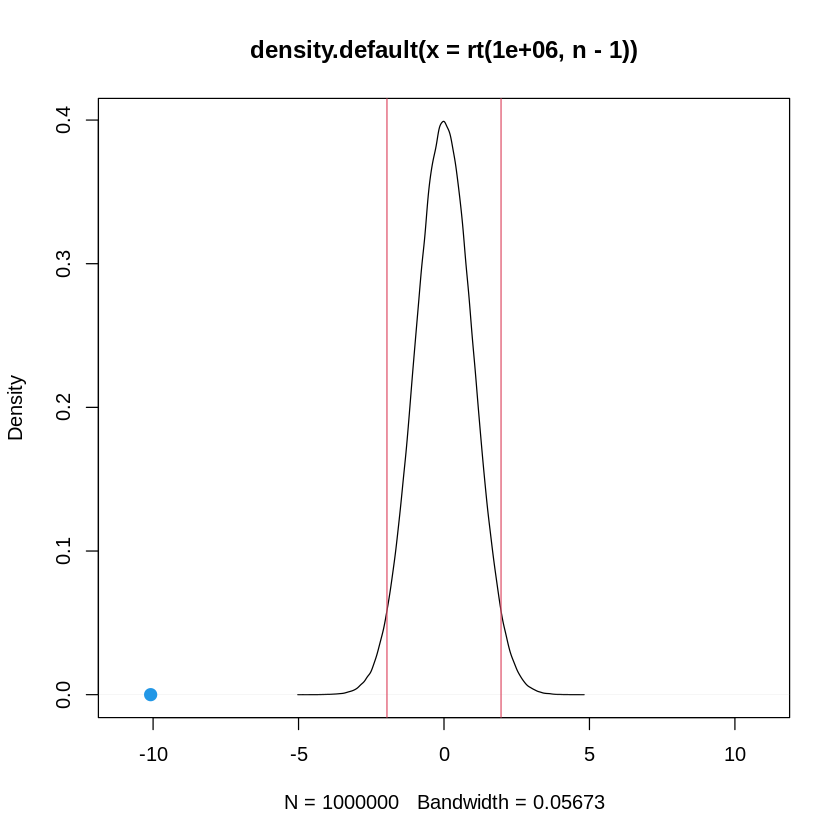

In [17]:
#let's test the hyphotesis that the mean weight and the mean length of this dataset are not significantly different from the population

#for doing the test, we must look for the mean values in the scientific documentations.
#many scientific articles report a mean weight of 3.300g and a mean length of 500mm
#the standard deviation of population is unknown, so a t-test must be performed
mu0=3300
n=length(Peso)
alpha=0.05
val_soglia=qt(alpha/2,n-1)
t.test(Peso,
       mu=mu0,
       conf.level=1-alpha,
       alternative="two.sided")
t_test=(mean(Peso)-mu0)/(sd(Peso)/sqrt(n))

plot(density(rt(1000000,n-1)),xlim=c(-5,5))
abline(v=qt(alpha/2,n-1),col=2)
abline(v=qt(1-alpha/2,n-1),col=2)
points(t_test,y=0,cex=2,pch=20,col=4)
#the t-test variable is out the reject zone, p-value is > than the significance level, the mean is inside the confidence interval
#the null hyphotesis is not rejected: the dataset mean weight is not significantly different from the population's one

mu0=500
n=length(Lunghezza)
alpha=0.05
val_soglia=qt(alpha/2,n-1)
t.test(Lunghezza,
       mu=mu0,
       conf.level=1-alpha,
       alternative="two.sided")
t_test=(mean(Lunghezza)-mu0)/(sd(Lunghezza)/sqrt(n))

plot(density(rt(1000000,n-1)),xlim=c(-11,11))
abline(v=qt(alpha/2,n-1),col=2)
abline(v=qt(1-alpha/2,n-1),col=2)
points(t_test,y=0,cex=2,pch=20,col=4)
#the t-test variable is out the reject zone, p-value is > than the significance level, the mean is inside the confidence interval
#the null hyphotesis is not rejected: the dataset mean length is not significantly different from the population's one

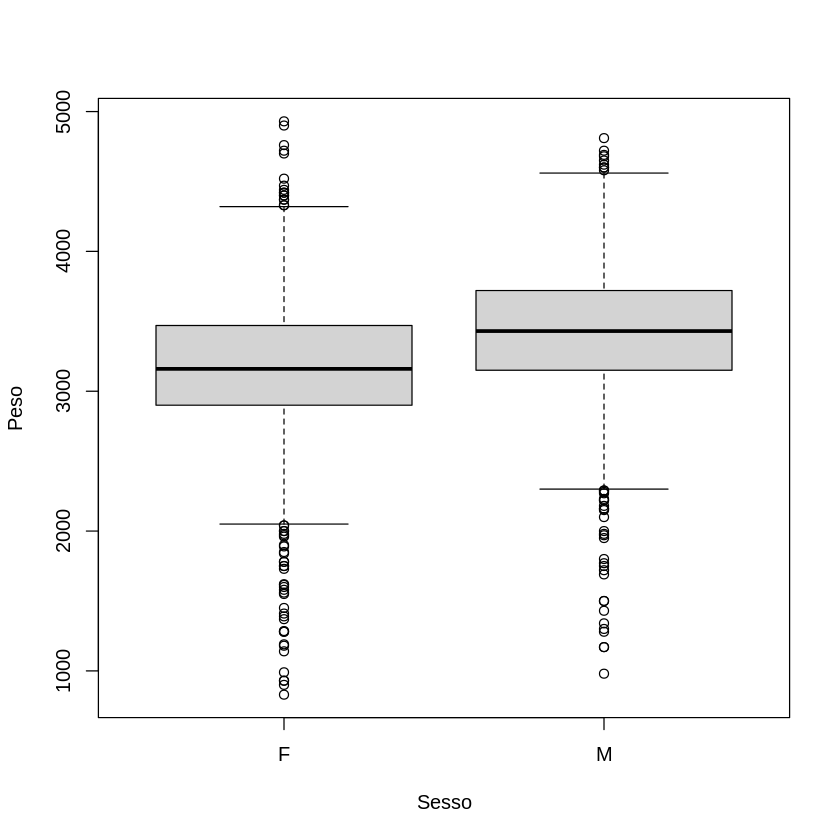

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



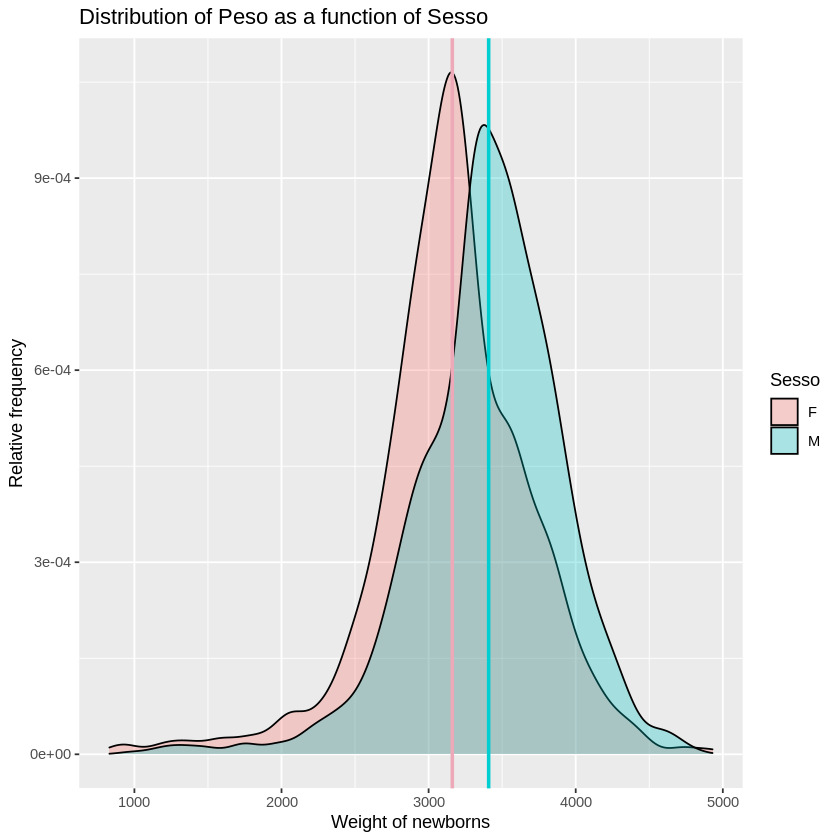

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    980    3150    3430    3408    3720    4810 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    830    2900    3160    3161    3470    4930 


	Welch Two Sample t-test

data:  Peso by Sesso
t = -12.106, df = 2490.7, p-value < 2.2e-16
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 -287.1051 -207.0615
sample estimates:
mean in group F mean in group M 
       3161.132        3408.215 



	Shapiro-Wilk normality test

data:  Peso
W = 0.97066, p-value < 2.2e-16



	Wilcoxon rank sum test with continuity correction

data:  Peso by Sesso
W = 538640, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


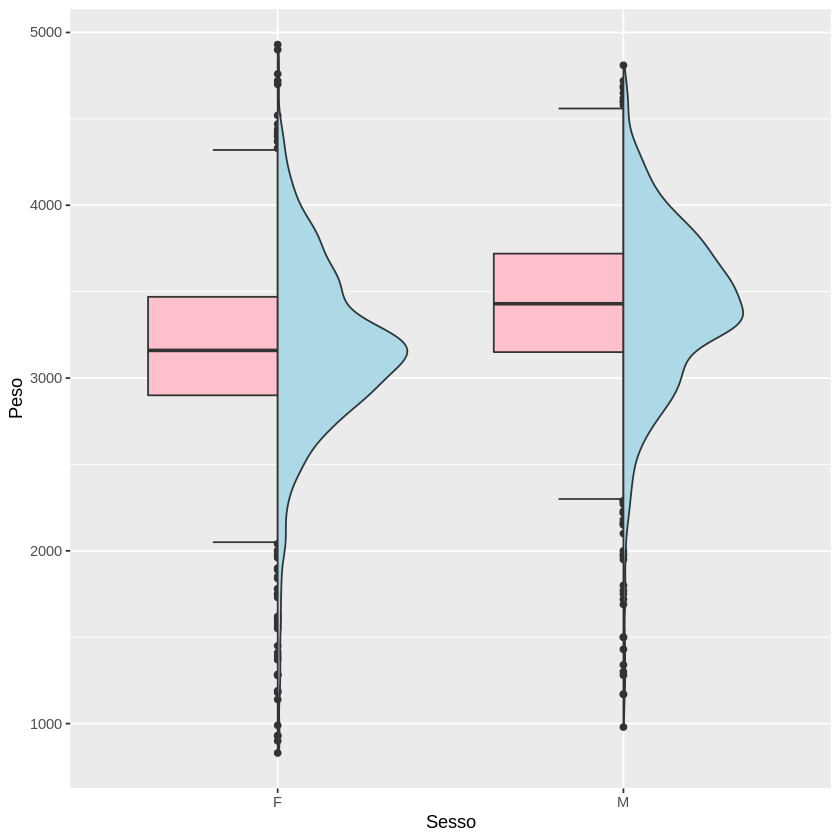

In [18]:
#let's now find out if some variables show significant differences based on sex
#H0: mu_M - mu_F  = 0
#H1: mu_M - mu_F != 0
boxplot(Peso~Sesso)
ggplot()+
  geom_density(aes(x=Peso,fill=Sesso),alpha=0.3)+
  labs(title="Distribution of Peso as a function of Sesso",
       x="Weight of newborns",
       y="Relative frequency")+
  geom_vline(xintercept = mean(Peso[Sesso=="M"]),col="darkturquoise",lwd=1)+
  geom_vline(xintercept = mean(Peso[Sesso=="F"]),col="pink2",lwd=1)
 
install.packages("gghalves")
library(gghalves)
ggplot(data=dati)+
  geom_half_boxplot(aes(x=Sesso,y=Peso),
                    side="l",fill="pink")+
  geom_half_violin(aes(x=Sesso,y=Peso),
                   side="r",fill="lightblue")
summary(Peso[Sesso=="M"])
summary(Peso[Sesso=="F"])
t.test(data=dati,
       Peso~Sesso,
       paired=F)
#for t-test related to differences between two groups a normal distribution of the variables is necessary
#this hypothesis is tested through a shapiro test
shapiro.test(Peso)
#very low p-value: the distribution is significantly far from normal: better wilcoxon test
wilcox.test(data=dati,
            Peso~Sesso,
            paired=F)
#p-value is low, so null hypothesis is rejected: male babies' weight is significantly different from female babies' one

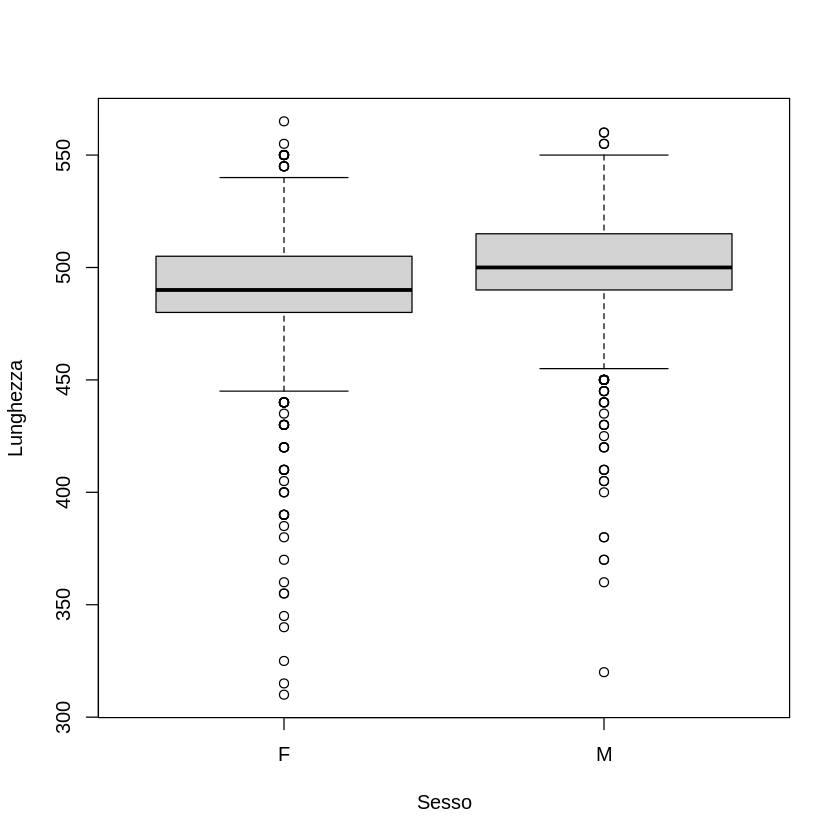

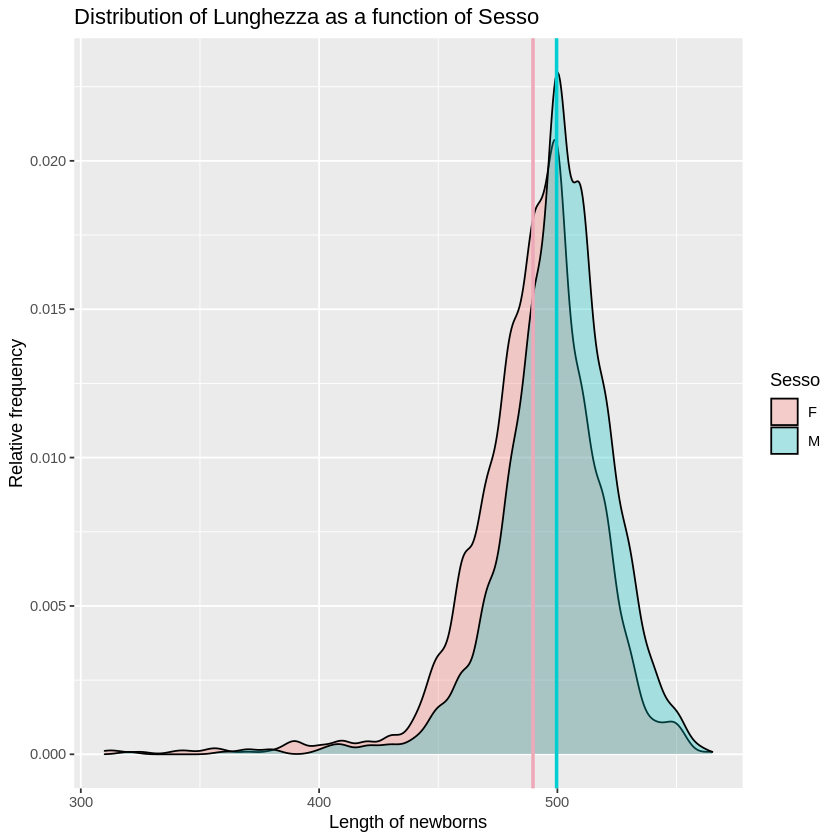

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  320.0   490.0   500.0   499.7   515.0   560.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  310.0   480.0   490.0   489.8   505.0   565.0 


	Welch Two Sample t-test

data:  Lunghezza by Sesso
t = -9.582, df = 2459.3, p-value < 2.2e-16
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 -11.929470  -7.876273
sample estimates:
mean in group F mean in group M 
       489.7643        499.6672 



	Shapiro-Wilk normality test

data:  Lunghezza
W = 0.90941, p-value < 2.2e-16



	Wilcoxon rank sum test with continuity correction

data:  Lunghezza by Sesso
W = 594454, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


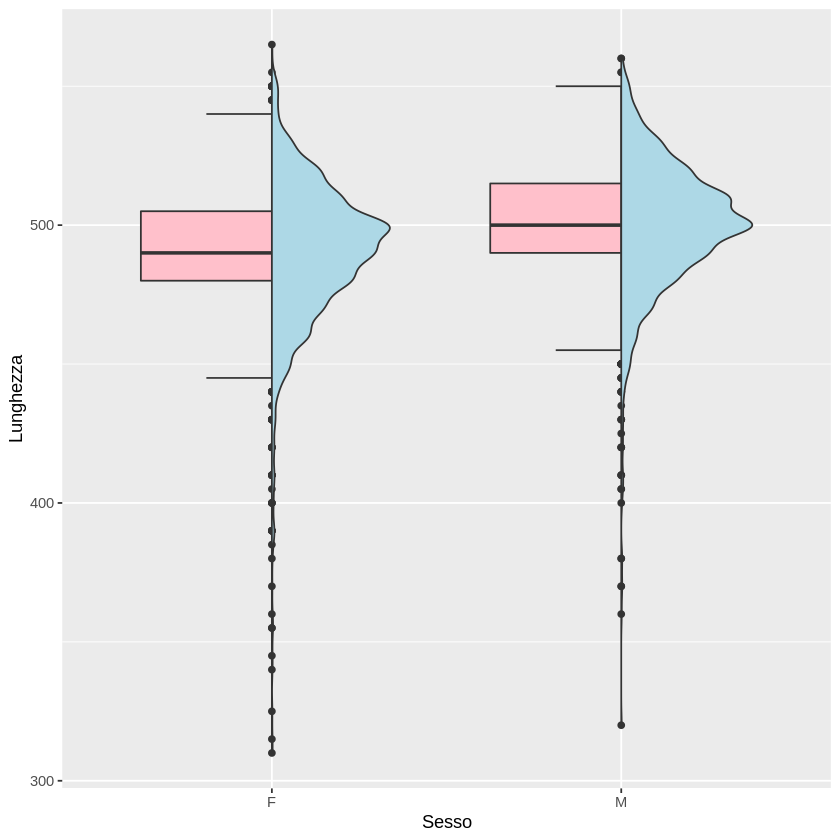

In [19]:
boxplot(Lunghezza~Sesso)
ggplot()+
  geom_density(aes(x=Lunghezza,fill=Sesso),alpha=0.3)+
  labs(title="Distribution of Lunghezza as a function of Sesso",
       x="Length of newborns",
       y="Relative frequency")+
  geom_vline(xintercept = mean(Lunghezza[Sesso=="M"]),col="darkturquoise",lwd=1)+
  geom_vline(xintercept = mean(Lunghezza[Sesso=="F"]),col="pink2",lwd=1)

ggplot(data=dati)+
  geom_half_boxplot(aes(x=Sesso,y=Lunghezza),
                    side="l",fill="pink")+
  geom_half_violin(aes(x=Sesso,y=Lunghezza),
                   side="r",fill="lightblue")
summary(Lunghezza[Sesso=="M"])
summary(Lunghezza[Sesso=="F"])
t.test(data=dati,
       Lunghezza~Sesso,
       paired=F)
shapiro.test(Lunghezza)
#very low p-value: the distribution is significantly far from normal: better wilcoxon test
wilcox.test(data=dati,
            Lunghezza~Sesso,
            paired=F)
#p-value is low, so null hypothesis is rejected: male babies' length is significantly different from female babies' one

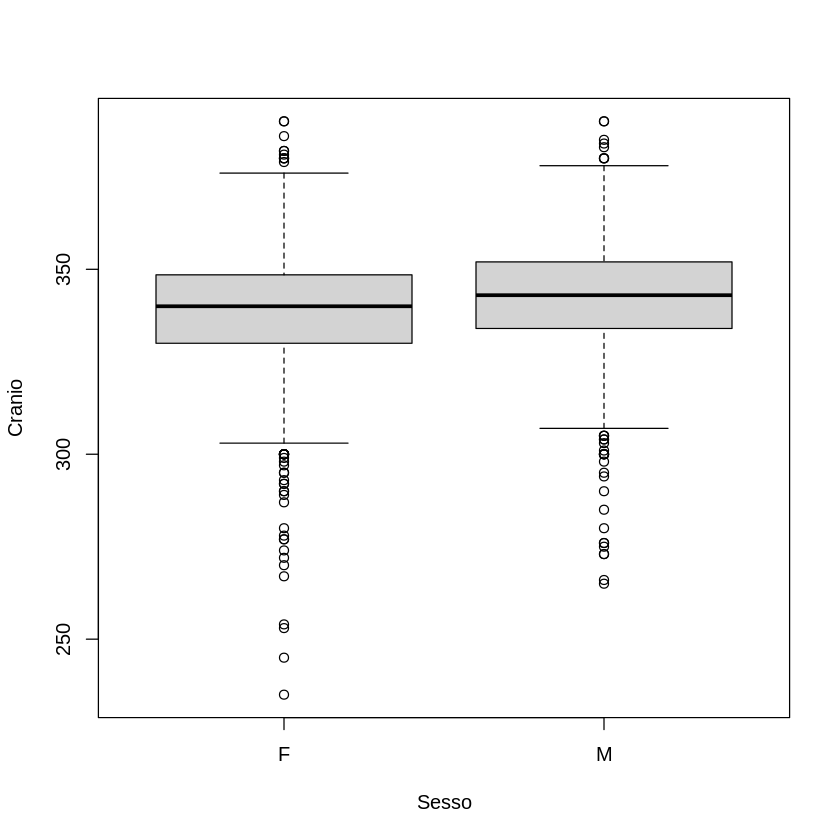

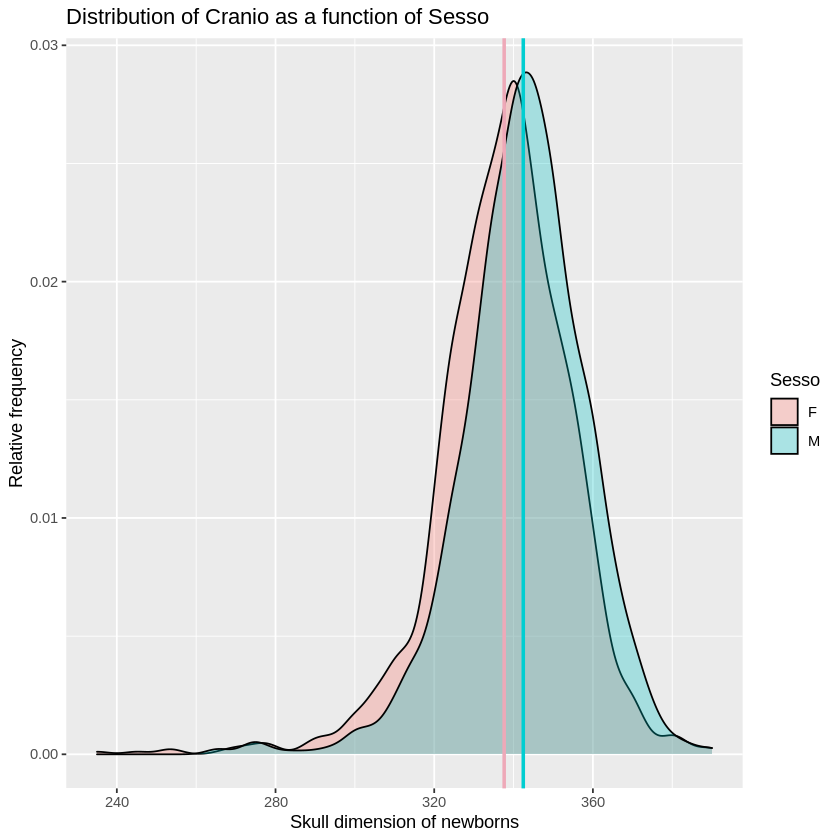

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  265.0   334.0   343.0   342.4   352.0   390.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  235.0   330.0   340.0   337.6   348.2   390.0 


	Welch Two Sample t-test

data:  Cranio by Sesso
t = -7.4102, df = 2491.4, p-value = 1.718e-13
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 -6.089912 -3.541270
sample estimates:
mean in group F mean in group M 
       337.6330        342.4486 



	Shapiro-Wilk normality test

data:  Cranio
W = 0.96357, p-value < 2.2e-16



	Wilcoxon rank sum test with continuity correction

data:  Cranio by Sesso
W = 641638, p-value = 9.633e-15
alternative hypothesis: true location shift is not equal to 0


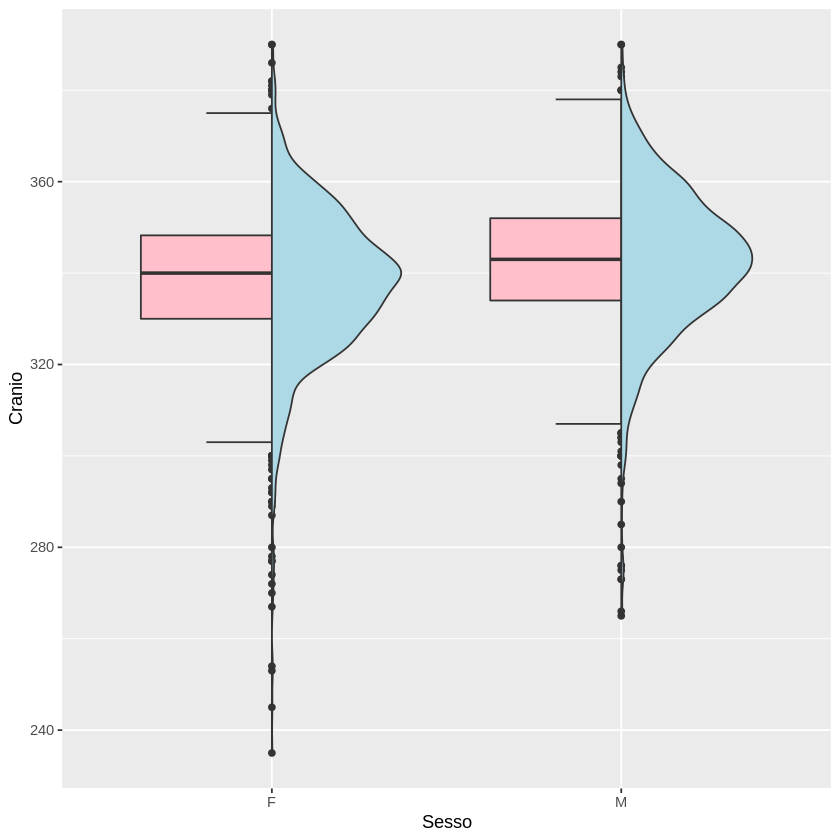

In [20]:
boxplot(Cranio~Sesso)
ggplot()+
  geom_density(aes(x=Cranio,fill=Sesso),alpha=0.3)+
  labs(title="Distribution of Cranio as a function of Sesso",
       x="Skull dimension of newborns",
       y="Relative frequency")+
  geom_vline(xintercept = mean(Cranio[Sesso=="M"]),col="darkturquoise",lwd=1)+
  geom_vline(xintercept = mean(Cranio[Sesso=="F"]),col="pink2",lwd=1)

ggplot(data=dati)+
  geom_half_boxplot(aes(x=Sesso,y=Cranio),
                    side="l",fill="pink")+
  geom_half_violin(aes(x=Sesso,y=Cranio),
                   side="r",fill="lightblue")
summary(Cranio[Sesso=="M"])
summary(Cranio[Sesso=="F"])
t.test(data=dati,
       Cranio~Sesso,
       paired=F)
shapiro.test(Cranio)
#very low p-value: the distribution is significantly far from normal: better wilcoxon test
wilcox.test(data=dati,
            Cranio~Sesso,
            paired=F)
#p-value is low, so null hypothesis is rejected: male babies' skull dimension is significantly different from female babies' one

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.00   25.00   28.00   28.24   32.00   46.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   25.00   28.00   28.14   32.00   44.00 


	Welch Two Sample t-test

data:  Anni.madre by Sesso
t = -0.47245, df = 2493.2, p-value = 0.6366
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 -0.5077802  0.3106044
sample estimates:
mean in group F mean in group M 
       28.13694        28.23553 



	Shapiro-Wilk normality test

data:  Anni.madre
W = 0.99492, p-value = 1.471e-07



	Wilcoxon rank sum test with continuity correction

data:  Anni.madre by Sesso
W = 774980, p-value = 0.7285
alternative hypothesis: true location shift is not equal to 0


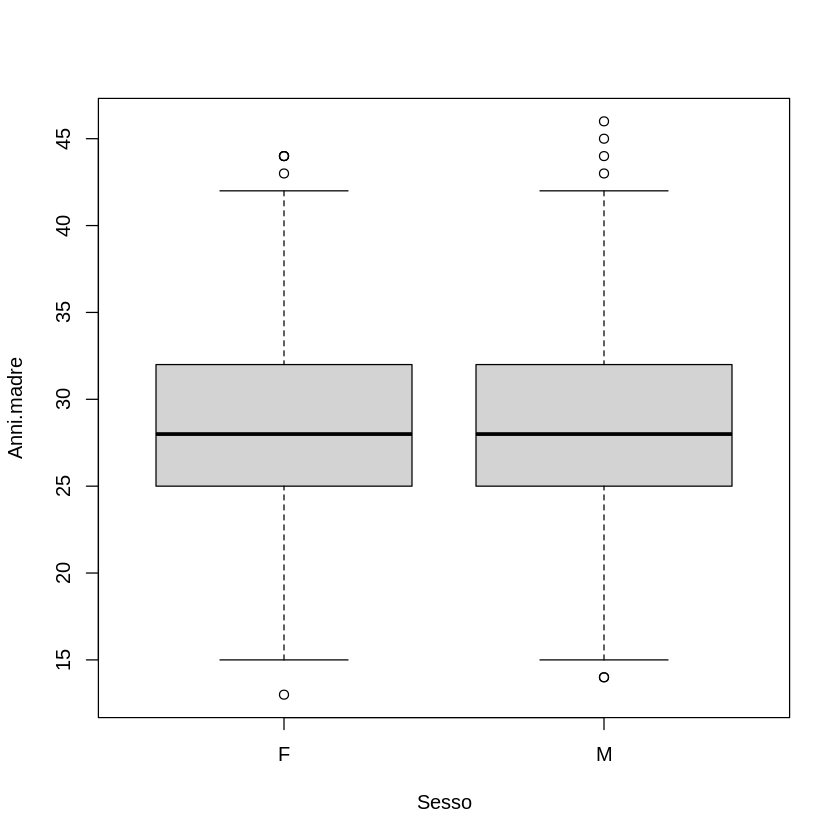

In [21]:
boxplot(Anni.madre~Sesso)
summary(Anni.madre[Sesso=="M"])
summary(Anni.madre[Sesso=="F"])
t.test(data=dati,
       Anni.madre~Sesso,
       paired=F)
shapiro.test(Anni.madre)
#very low p-value: the distribution is significantly far from normal: better wilcoxon test
wilcox.test(data=dati,
       Anni.madre~Sesso,
       paired=F)
#p-value is high, so null hypothesis is rejected: the age of male babies' mothers is NOT significantly different from the one of female babies' mothers

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   1.013   1.000  12.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.9498  1.0000 10.0000 


	Welch Two Sample t-test

data:  N.gravidanze by Sesso
t = -1.2299, df = 2476.8, p-value = 0.2188
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 -0.16349703  0.03745509
sample estimates:
mean in group F mean in group M 
      0.9498408       1.0128617 



	Shapiro-Wilk normality test

data:  N.gravidanze
W = 0.72125, p-value < 2.2e-16



	Wilcoxon rank sum test with continuity correction

data:  N.gravidanze by Sesso
W = 763852, p-value = 0.304
alternative hypothesis: true location shift is not equal to 0


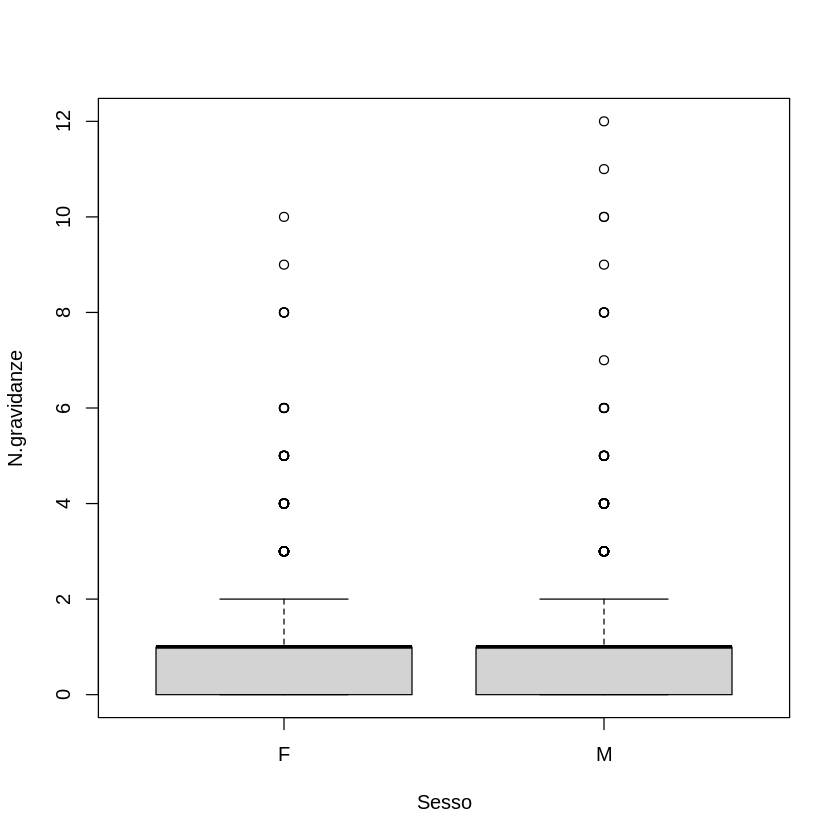

In [22]:
boxplot(N.gravidanze~Sesso)
summary(N.gravidanze[Sesso=="M"])
summary(N.gravidanze[Sesso=="F"])
t.test(data=dati,
       N.gravidanze~Sesso,
       paired=F)
shapiro.test(N.gravidanze)
#very low p-value: the distribution is significantly far from normal: better wilcoxon test
wilcox.test(data=dati,
            N.gravidanze~Sesso,
            paired=F)
#p-value is high, so null hypothesis is rejected: the n° of pregnancies of women that gave birth to a male is NOT significantly different from the one women that gave birth to a female

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  27.00   38.00   40.00   39.23   40.00   43.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.00   38.00   39.00   38.73   40.00   43.00 


	Welch Two Sample t-test

data:  Gestazione by Sesso
t = -6.7072, df = 2446.6, p-value = 2.456e-11
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 -0.6418172 -0.3514294
sample estimates:
mean in group F mean in group M 
       38.73328        39.22990 



	Shapiro-Wilk normality test

data:  Gestazione
W = 0.83328, p-value < 2.2e-16



	Wilcoxon rank sum test with continuity correction

data:  Gestazione by Sesso
W = 652659, p-value = 2.937e-13
alternative hypothesis: true location shift is not equal to 0


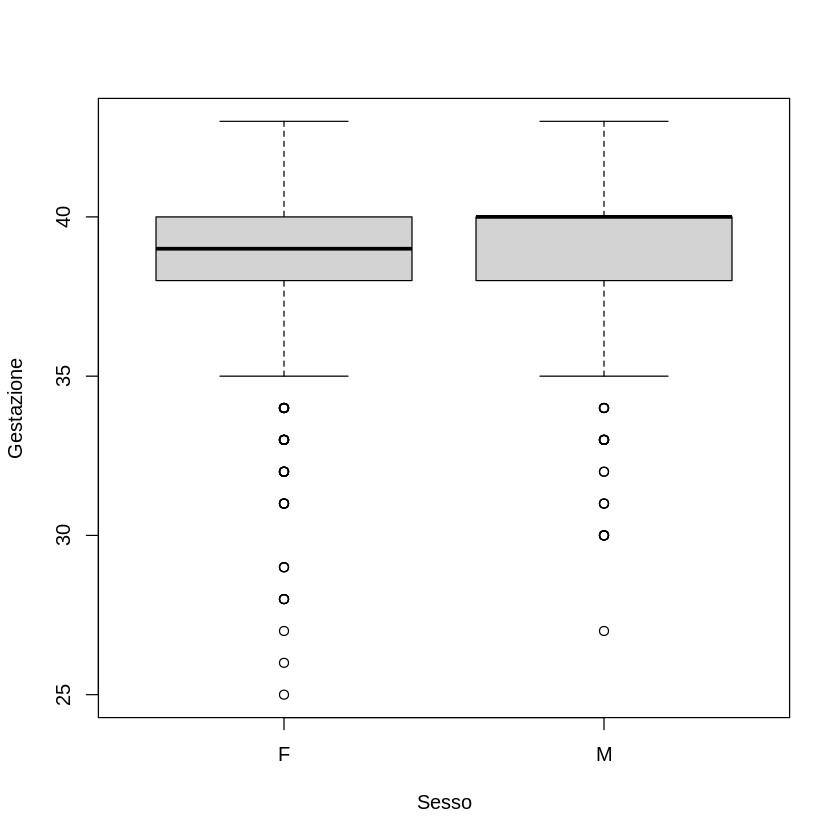

In [23]:
boxplot(Gestazione~Sesso)
summary(Gestazione[Sesso=="M"])
summary(Gestazione[Sesso=="F"])
t.test(data=dati,
       Gestazione~Sesso,
       paired=F)
shapiro.test(Gestazione)
#very low p-value: the distribution is significantly far from normal: better wilcoxon test
wilcox.test(data=dati,
       Gestazione~Sesso,
       paired=F)
#p-value is low, so null hypothesis is rejected: gestation for male newborns is significantly different from female newborns' one
#interesting point: with a 95% confidence level female infants seem to born significantly before a male infant

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’





	Pearson's Chi-squared test

data:  tabella
X-squared = 1.0972, df = 2, p-value = 0.5778


          Ospedale
Tipo.parto osp1 osp2 osp3
       Ces  242  254  232
       Nat  574  595  603

          Ospedale
Tipo.parto   osp1   osp2   osp3
       Ces 0.0968 0.1016 0.0928
       Nat 0.2296 0.2380 0.2412


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  Tipo.parto_d and Ospedale 

     osp1 osp2
osp2 1    -   
osp3 1    1   

P value adjustment method: bonferroni 

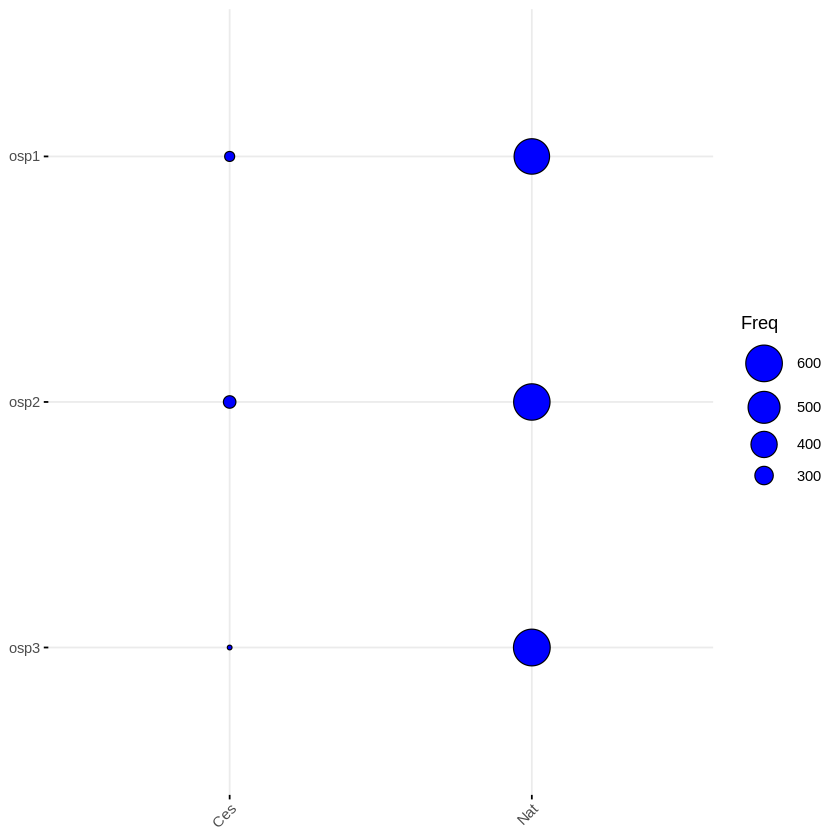

In [24]:
#it is told that in some hospitals more cesarean sections are practised. Let's see if there is some statistical evidence...


#to test this hypothesis a squared chi test could be performed, being particularly good with qualitative variables
tabella=table(Tipo.parto,Ospedale)
install.packages("ggpubr")
ggpubr::ggballoonplot((as.data.frame((tabella))),
                      fill="blue")
chisq.test(tabella)
#high p-value: no significant relationship between the two variables


#the hypothesis could also be tested through a multiple comparisons wilcoxon test on cesarean sections' percentages
#H0: P_osp_i  = P_osp_j
#H1: P_osp_i != P_osp_j
#creation of dummy variable
Tipo.parto_d=ifelse(Tipo.parto=="Ces",1,0)
table(Tipo.parto,Ospedale)
table(Tipo.parto,Ospedale)/n
pairwise.wilcox.test(Tipo.parto_d,Ospedale,
                paired=F,
                pool.sd=T,
                p.adjust.method = "bonferroni")
#the test shows all p-value=1:  no significant relationship between the two variables


	Wilcoxon rank sum test with continuity correction

data:  Peso by Fumatrici
W = 138162, p-value = 0.05971
alternative hypothesis: true location shift is not equal to 0


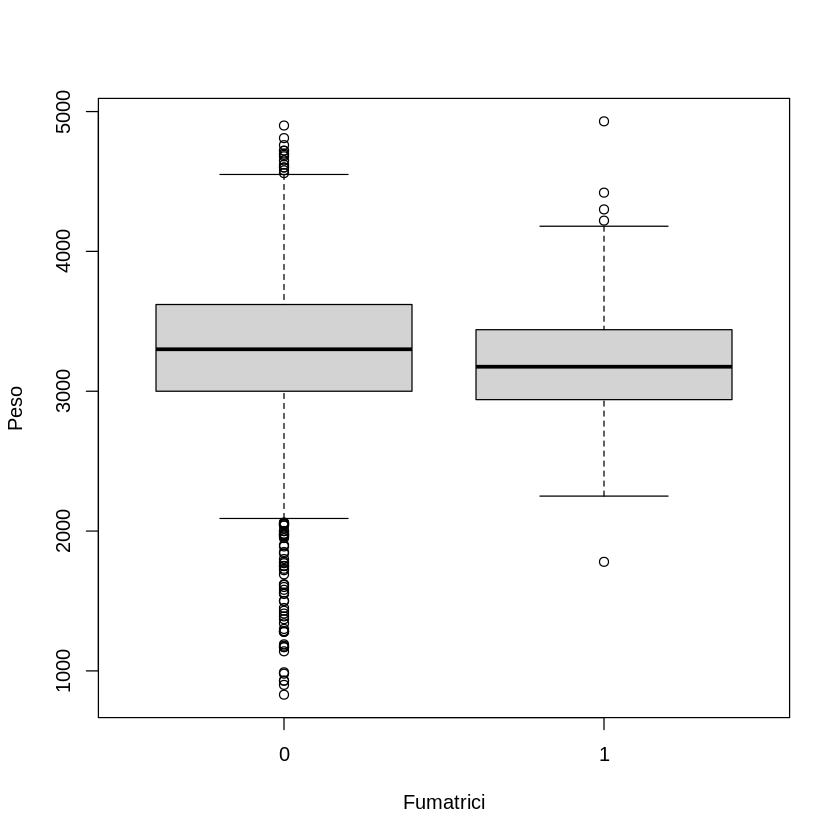

[1] -0.02377346

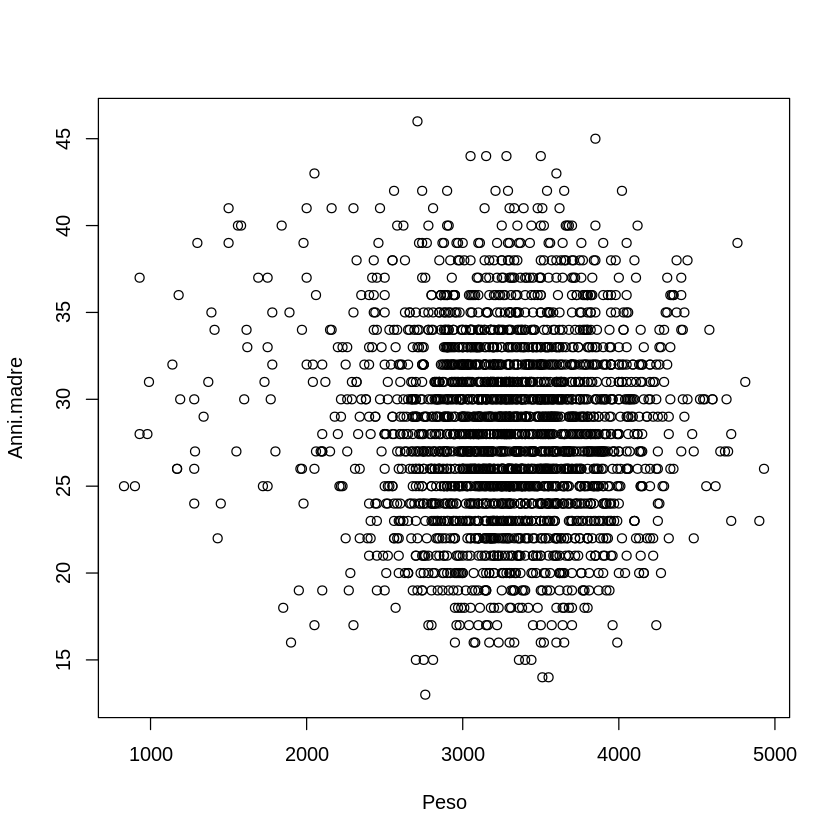


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  Peso and Anni.madre_cl 

        [0,25] (25,28] (28,32]
(25,28] 1.00   -       -      
(28,32] 1.00   1.00    -      
(32,46] 1.00   0.57    0.17   

P value adjustment method: bonferroni 

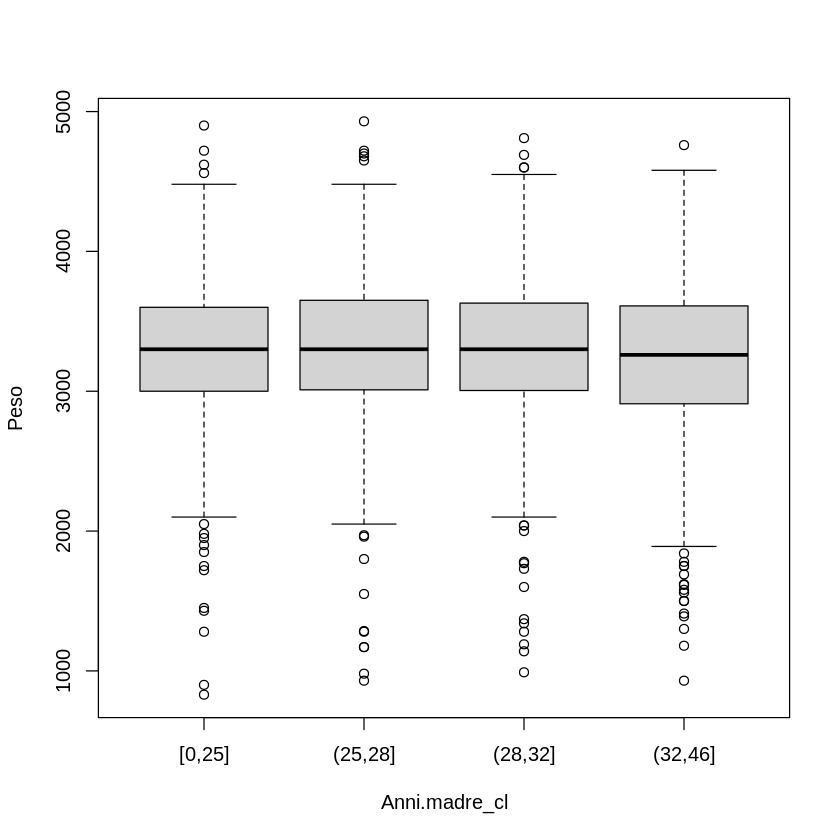

[1] 0.0024073

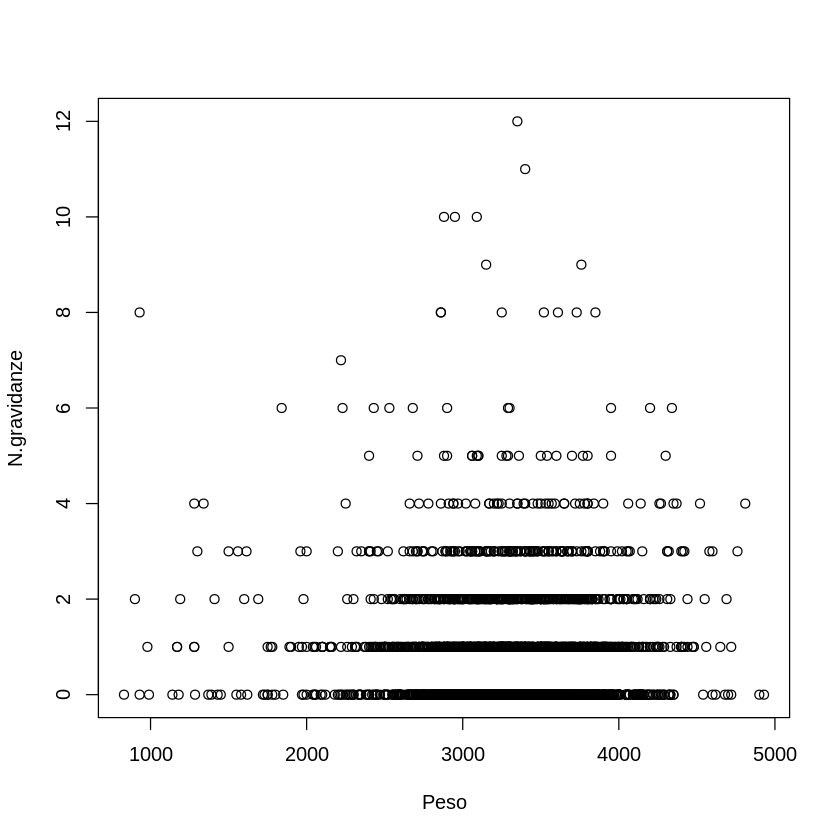


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  Peso and N.gravidanze_cl 

       [0,1) [1,2) [2,4)
[1,2)  1     -     -    
[2,4)  1     1     -    
[4,13) 1     1     1    

P value adjustment method: bonferroni 

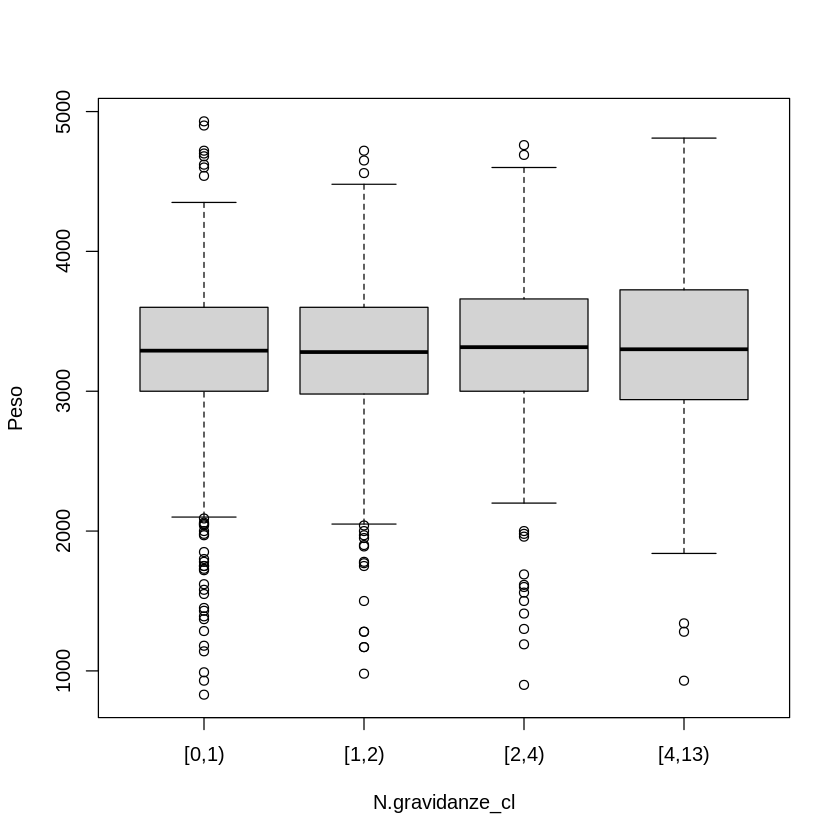

[1] 0.5917687

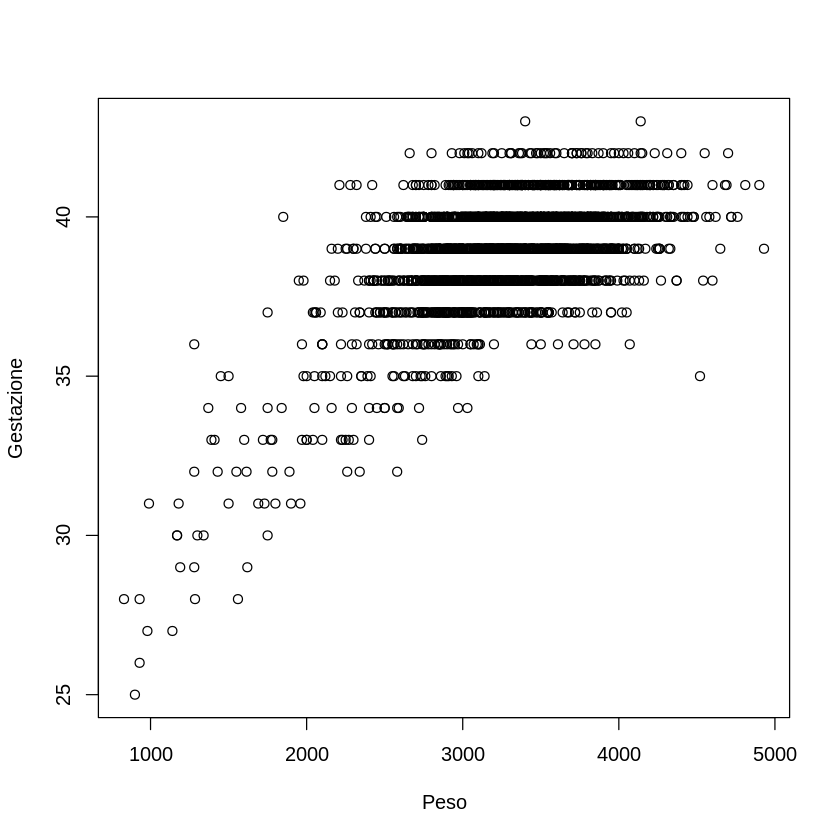


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  Peso and Gestazione_cl 

        [25,38] (38,39] (39,40]
(38,39] < 2e-16 -       -      
(39,40] < 2e-16 1.5e-07 -      
(40,43] < 2e-16 < 2e-16 0.00022

P value adjustment method: bonferroni 

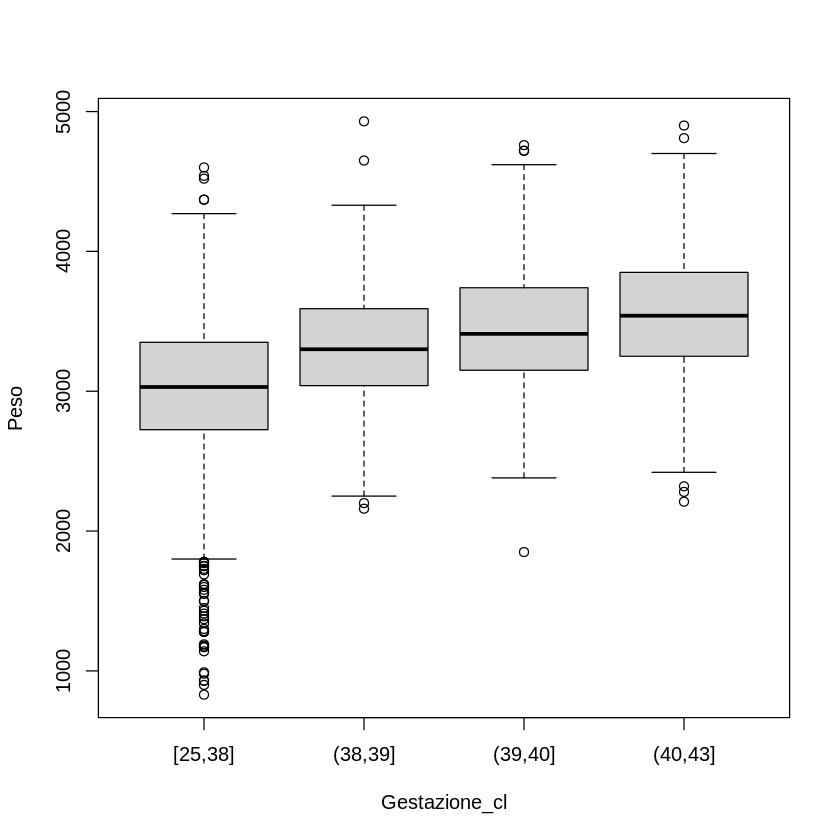

[1] 0.7960368

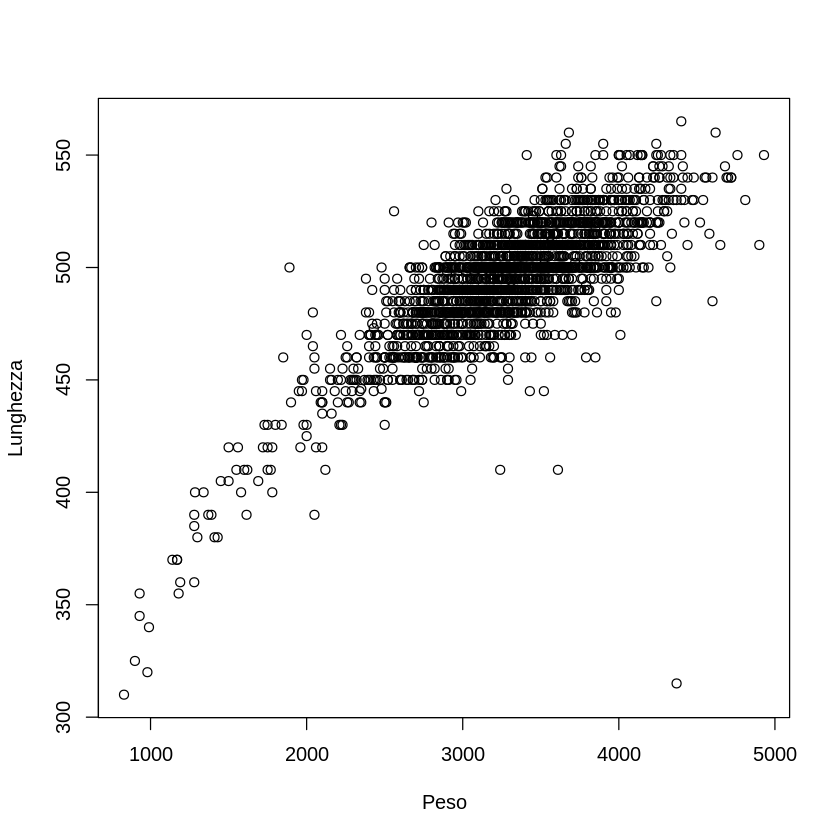


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  Peso and Lunghezza_cl 

          [310,480] (480,500] (500,510]
(480,500] <2e-16    -         -        
(500,510] <2e-16    <2e-16    -        
(510,565] <2e-16    <2e-16    <2e-16   

P value adjustment method: bonferroni 

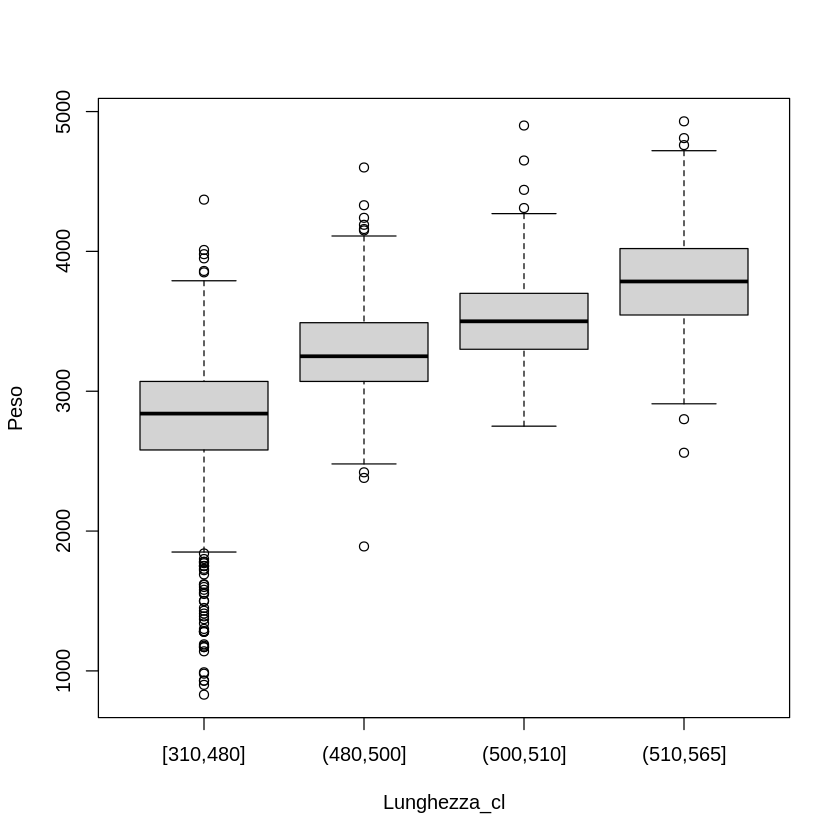

[1] 0.7048015

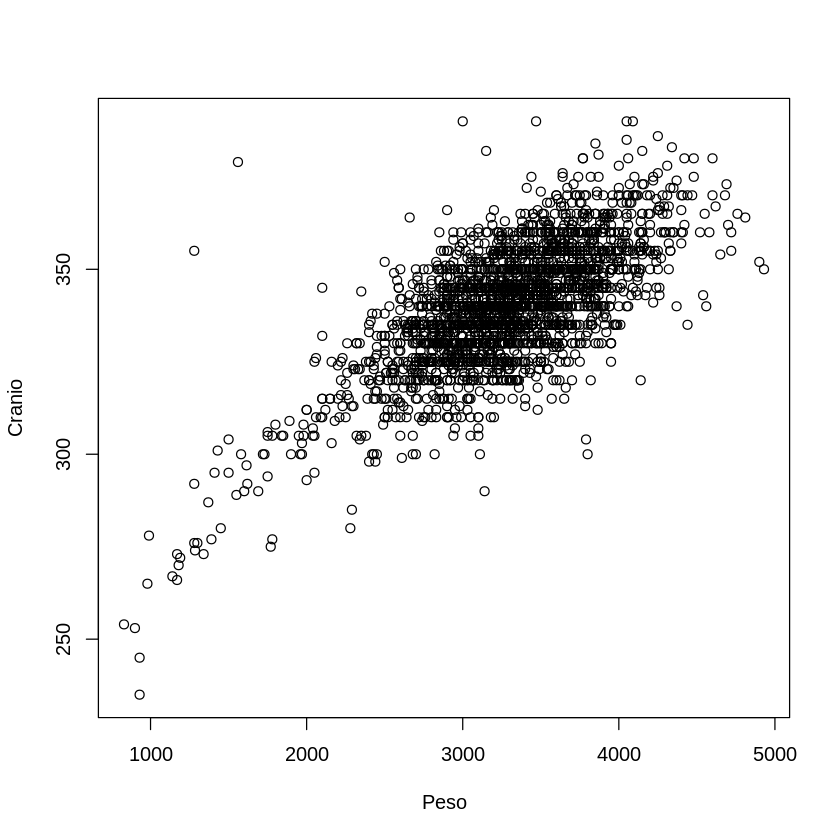


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  Peso and Cranio_cl 

          [235,330] (330,340] (340,350]
(330,340] <2e-16    -         -        
(340,350] <2e-16    <2e-16    -        
(350,390] <2e-16    <2e-16    <2e-16   

P value adjustment method: bonferroni 

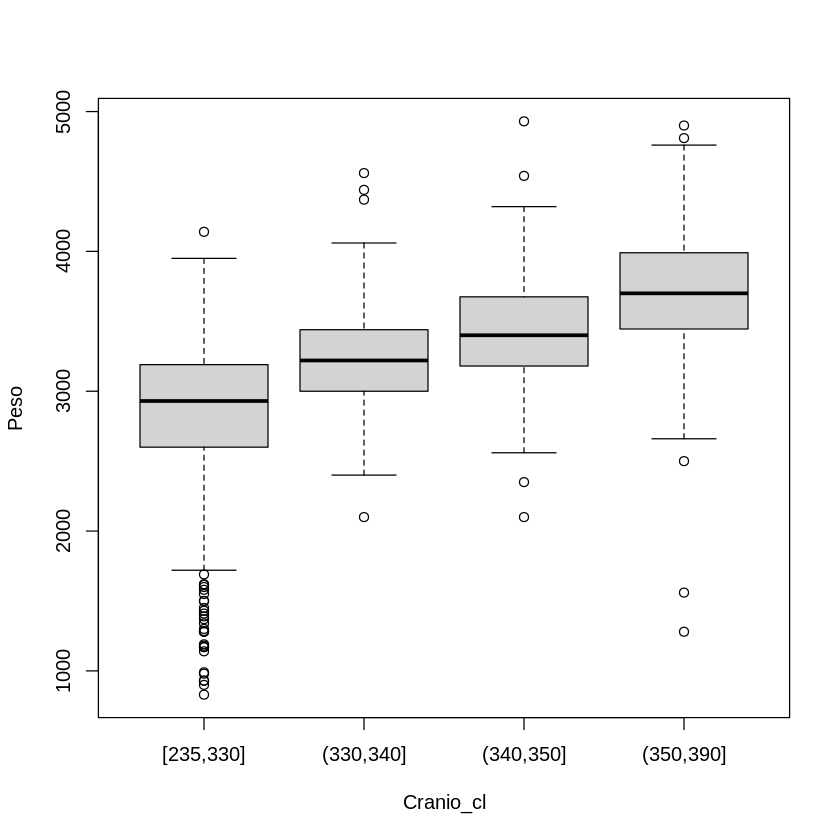


	Wilcoxon rank sum test with continuity correction

data:  Peso by Tipo.parto
W = 634748, p-value = 0.5315
alternative hypothesis: true location shift is not equal to 0


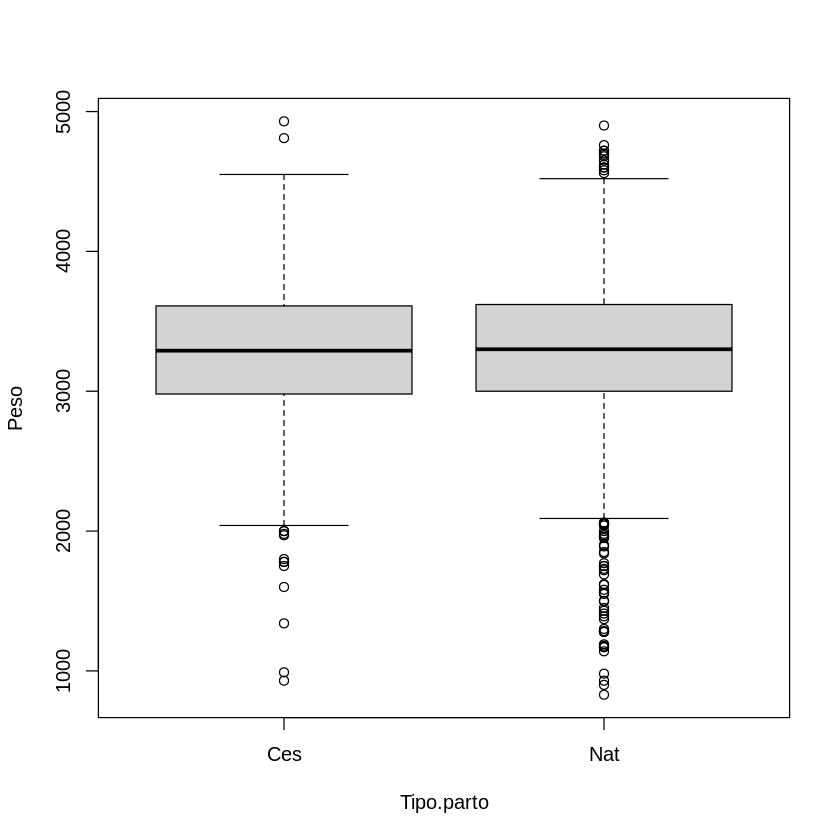


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  Peso and Ospedale 

     osp1 osp2
osp2 1.00 -   
osp3 0.73 0.26

P value adjustment method: bonferroni 

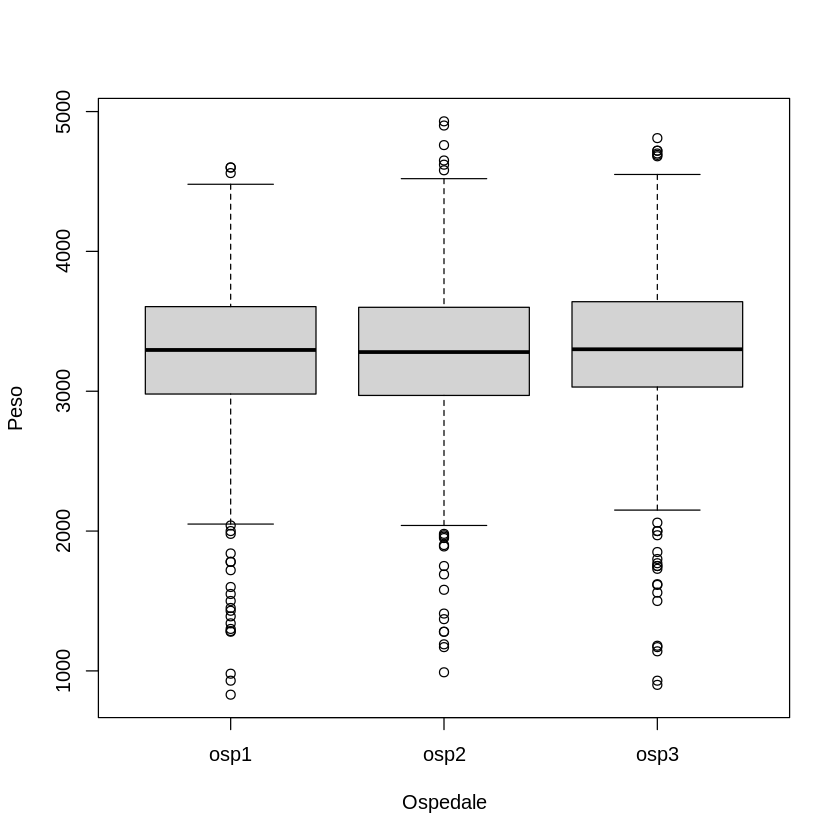


	Wilcoxon rank sum test with continuity correction

data:  Cranio by Fumatrici
W = 131471, p-value = 0.3393
alternative hypothesis: true location shift is not equal to 0


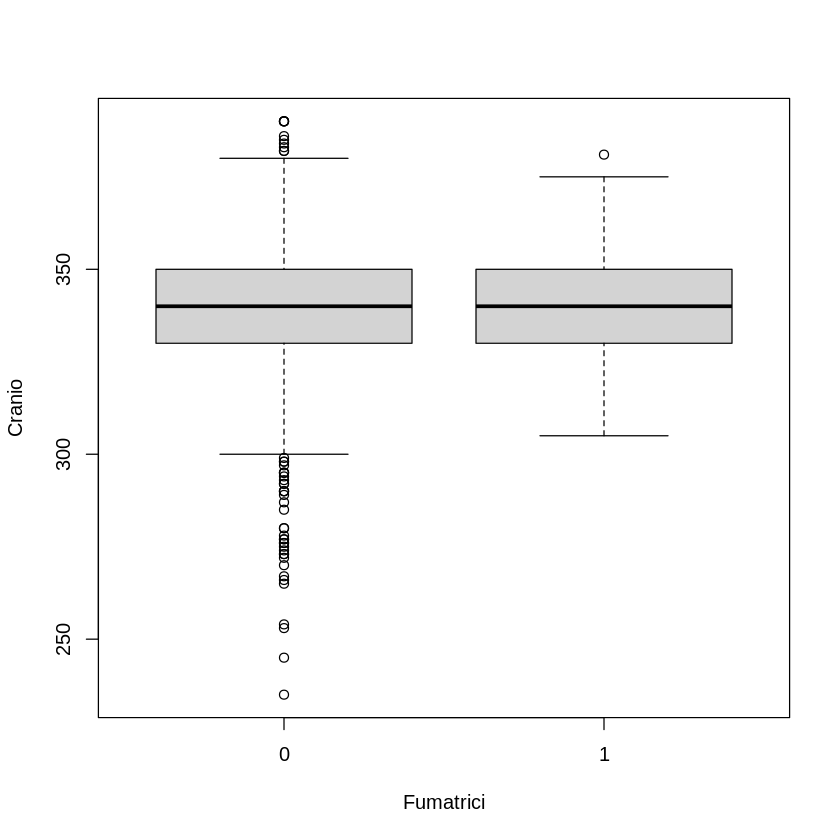


	Wilcoxon rank sum test with continuity correction

data:  Lunghezza by Fumatrici
W = 139508, p-value = 0.0377
alternative hypothesis: true location shift is not equal to 0


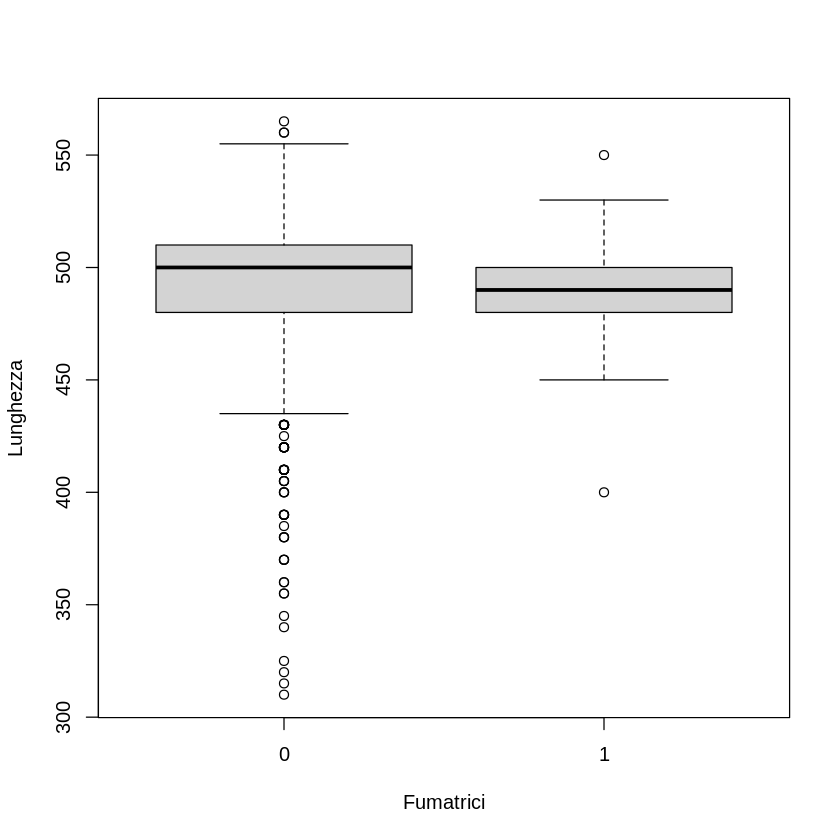

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.00   38.00   39.00   38.97   40.00   43.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   38.00   40.00   39.27   40.00   42.00 


	Welch Two Sample t-test

data:  Gestazione by Fumatrici
t = -2.0824, df = 119.26, p-value = 0.03944
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.58791720 -0.01481813
sample estimates:
mean in group 0 mean in group 1 
       38.96786        39.26923 



	Shapiro-Wilk normality test

data:  Gestazione
W = 0.83328, p-value < 2.2e-16



	Wilcoxon rank sum test with continuity correction

data:  Gestazione by Fumatrici
W = 115806, p-value = 0.2118
alternative hypothesis: true location shift is not equal to 0


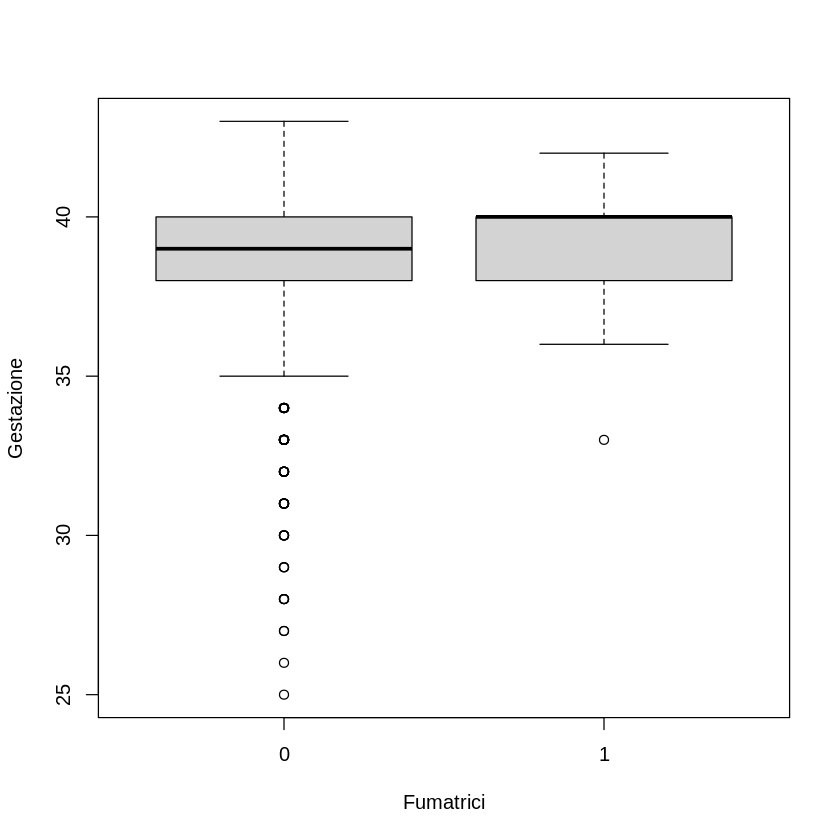


	Pearson's Chi-squared test

data:  tabella
X-squared = 2.3982, df = 3, p-value = 0.494


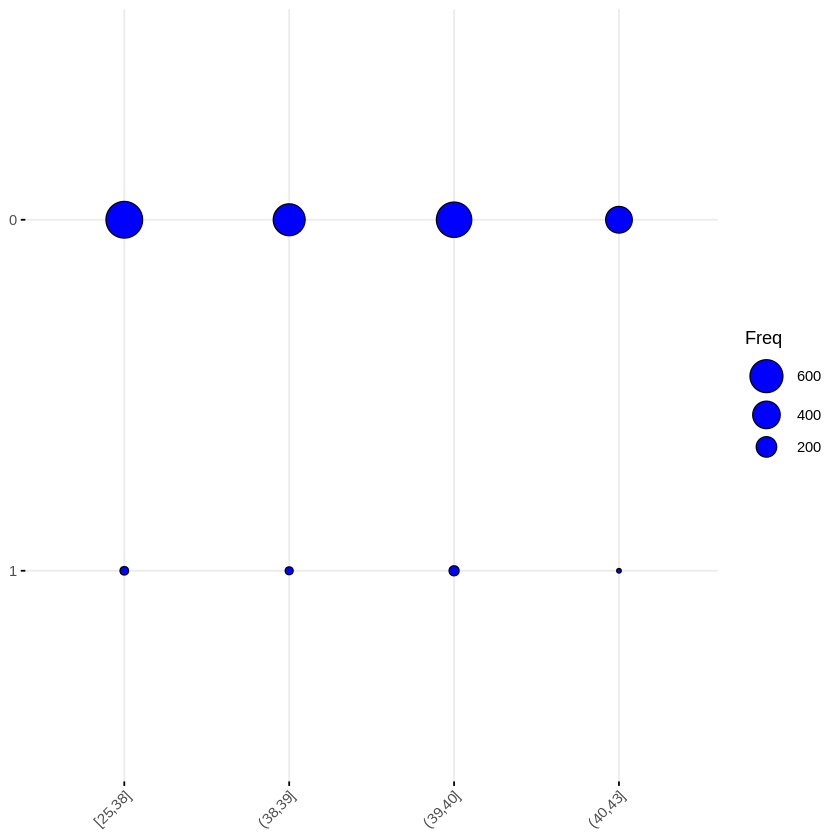


	Pearson's Chi-squared test with Yates' continuity correction

data:  tabella
X-squared = 0.69629, df = 1, p-value = 0.404


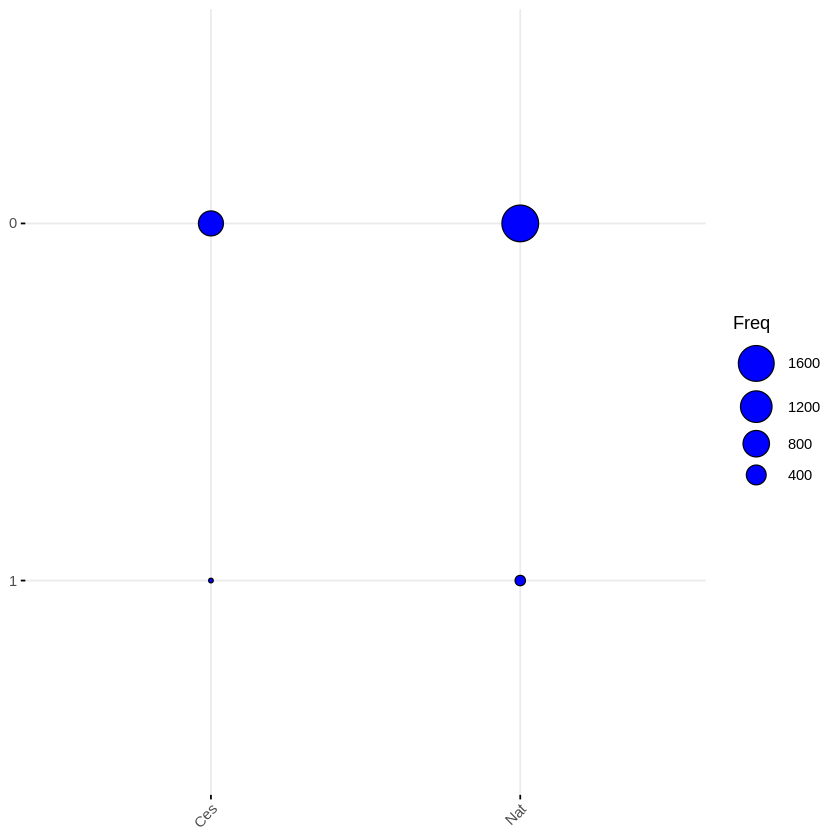

In [26]:
##################################################################################################################
################################### ------ MULTIDIMENSIONAL ANALYSIS ------ ######################################
##################################################################################################################

#let's analyse the one-on-one connections, especially with the response variable weight



#Variable weight:


boxplot(Peso~Fumatrici)
wilcox.test(data=dati,
            Peso~Fumatrici,
            paired=F)
#p-value is slightly > significance level of 5%: borderline situation, null hypothesis is not rejected, but the smoker/non smoker variable could slightly influence a baby's weight 


plot(Peso,Anni.madre)
cor(Peso,Anni.madre)
boxplot(Peso~Anni.madre_cl)
pairwise.wilcox.test(Peso,Anni.madre_cl,
                     paired=F,
                     pool.sd=T,
                     p.adjust.method = "bonferroni")
#correlation index is nearly 0: there is no correlation
#the result is confirmed by the wilcoxon test on variable in classes

plot(Peso,N.gravidanze)
cor(Peso,N.gravidanze)
boxplot(Peso~N.gravidanze_cl)
pairwise.wilcox.test(Peso,N.gravidanze_cl,
                     paired=F,
                     pool.sd=T,
                     p.adjust.method = "bonferroni")
#correlation index is nearly 0: ther is no correlation
#the result is confirmed by the wilcoxon test on variable in classes

plot(Peso,Gestazione)
cor(Peso,Gestazione)
boxplot(Peso~Gestazione_cl)
pairwise.wilcox.test(Peso,Gestazione_cl,
                     paired=F,
                     pool.sd=T,
                     p.adjust.method = "bonferroni")
#correlation index is >0: there is a positive correlation
#the result is confirmed by the wilcoxon test on variable in classes

plot(Peso,Lunghezza)
cor(Peso,Lunghezza)
boxplot(Peso~Lunghezza_cl)
pairwise.wilcox.test(Peso,Lunghezza_cl,
                     paired=F,
                     pool.sd=T,
                     p.adjust.method = "bonferroni")
#correlation index is >0: there is a positive correlation
#the result is confirmed by the wilcoxon test on variable in classes

plot(Peso,Cranio)
cor(Peso,Cranio)
boxplot(Peso~Cranio_cl)
pairwise.wilcox.test(Peso,Cranio_cl,
                     paired=F,
                     pool.sd=T,
                     p.adjust.method = "bonferroni")
#correlation index is >0: there is a positive correlation
#the result is confirmed by the wilcoxon test on variable in classes

boxplot(Peso~Tipo.parto)
wilcox.test(data=dati,
            Peso~Tipo.parto,
            paired=F)
#high p-value: null hypothesis is not rejected, there is no significant difference

boxplot(Peso~Ospedale)
pairwise.wilcox.test(Peso,Ospedale,
                     paired=F,
                     pool.sd=T,
                     p.adjust.method = "bonferroni")
#high p-values: null hypothesis is not rejected, no significant difference between mean weights among hospitals


#correlations with smoker/non smoker variable to analyse:
#1) if smoke could influence the parameter of the newborn (skull dimension and length)
#2) if smoke could be related to more premature births


boxplot(Cranio~Fumatrici)
wilcox.test(data=dati,
            Cranio~Fumatrici,
            paired=F)
#high p-value: null hypothesis is not rejected, there is no significant difference

boxplot(Lunghezza~Fumatrici)
wilcox.test(data=dati,
            Lunghezza~Fumatrici,
            paired=F)
#low p-value: null hypothesis is rejected, there is a significant difference


boxplot(Gestazione~Fumatrici)
summary(Gestazione[Fumatrici=="0"])
summary(Gestazione[Fumatrici=="1"])
t.test(data=dati,
       Gestazione~Fumatrici,
       paired=F)
shapiro.test(Gestazione)
wilcox.test(data=dati,
            Gestazione~Fumatrici,
            paired=F)
#high p-value: null hypothesis is not rejected, there is no significant difference between Gestazione and Fumatrici
#interesting result: there seems to be no significant danger of premature births for mothers who smoke

tabella=table(Gestazione_cl,Fumatrici)
ggpubr::ggballoonplot((as.data.frame((tabella))),
                      fill="blue")
chisq.test(tabella)
#with squared chi test between Fumatrici and Gestazione divided by classes, the same conclusion can be made

tabella=table(Tipo.parto,Fumatrici)
ggpubr::ggballoonplot((as.data.frame((tabella))),
                      fill="blue")
chisq.test(tabella)
#squared chi test between Fumatrici and Tipo.parto divided by classes has been made: null hypothesis is not rejected, there is no significant evidence

[1] -0.1349262

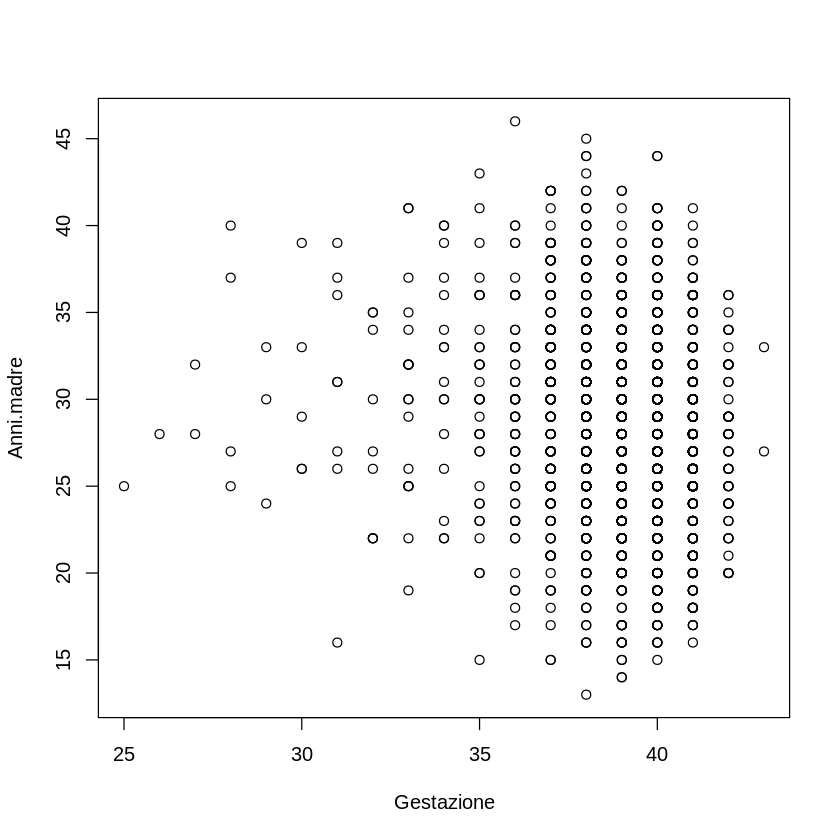


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  Gestazione and Anni.madre_cl 

        [0,25]  (25,28] (28,32]
(25,28] 1.0000  -       -      
(28,32] 0.0017  0.0709  -      
(32,46] 3.6e-10 4.6e-07 0.0048 

P value adjustment method: bonferroni 

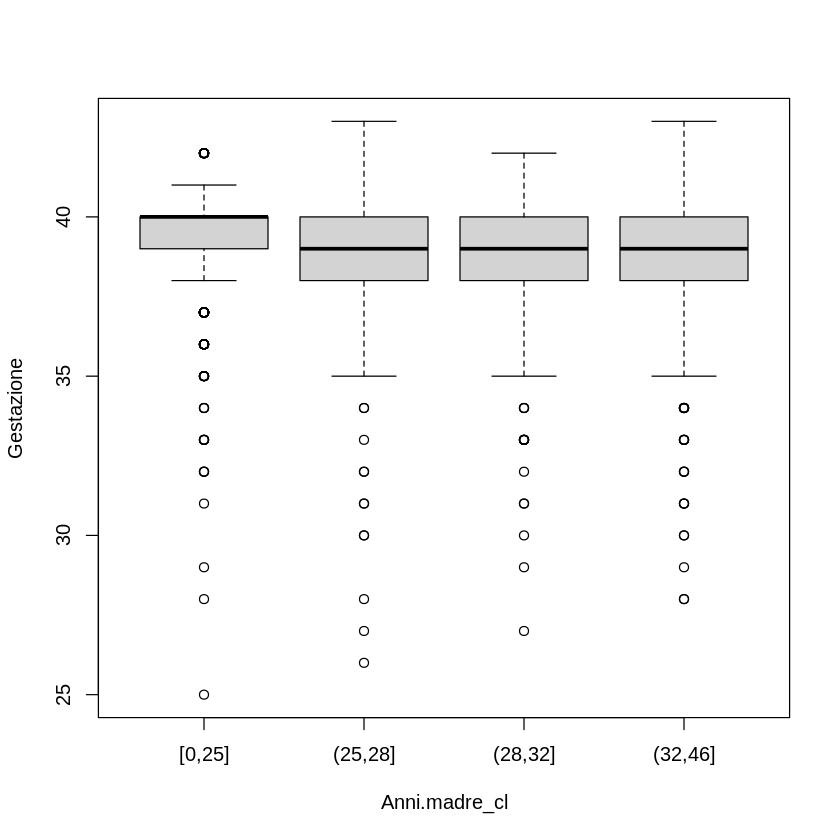


	Wilcoxon rank sum test with continuity correction

data:  Anni.madre by Tipo.parto
W = 643944, p-value = 0.9482
alternative hypothesis: true location shift is not equal to 0


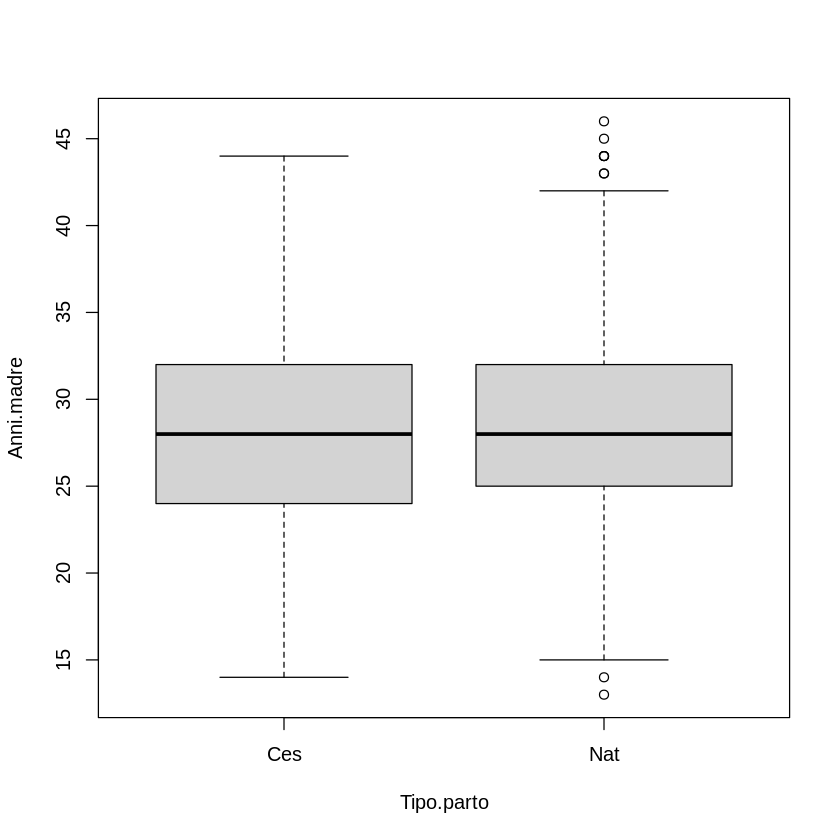

In [28]:
#correlations with Anni.madre variable to analyse:
#1) if mothers' age can be correlated with gestation time
#2) if mothers' age can be correlated with birth typology


plot(Gestazione,Anni.madre)
#from scatterplot no particular correlation is seen
cor(Gestazione,Anni.madre)
#linear correlation between the two quantitative variables is light and negative: the higher the age the lower the gestation time
boxplot(Gestazione~Anni.madre_cl)
#boxplot with Anni.madre divided in classes: light reduction of gestation time for last age class

pairwise.wilcox.test(Gestazione,Anni.madre_cl,
                     paired=F,
                     pool.sd=T,
                     p.adjust.method = "bonferroni")
#multiple wilcoxon test on age classes to find out possible tendencies:
#significant difference between gestation time of classes [0,34) e [34,47)
#interesting result: remaining pregnant after 35 seems to increase the probability of premature births

boxplot(Anni.madre~Tipo.parto)
wilcox.test(data=dati,
            Anni.madre~Tipo.parto,
            paired=F)
#very high p-value: no difference between mother's age and birth typology

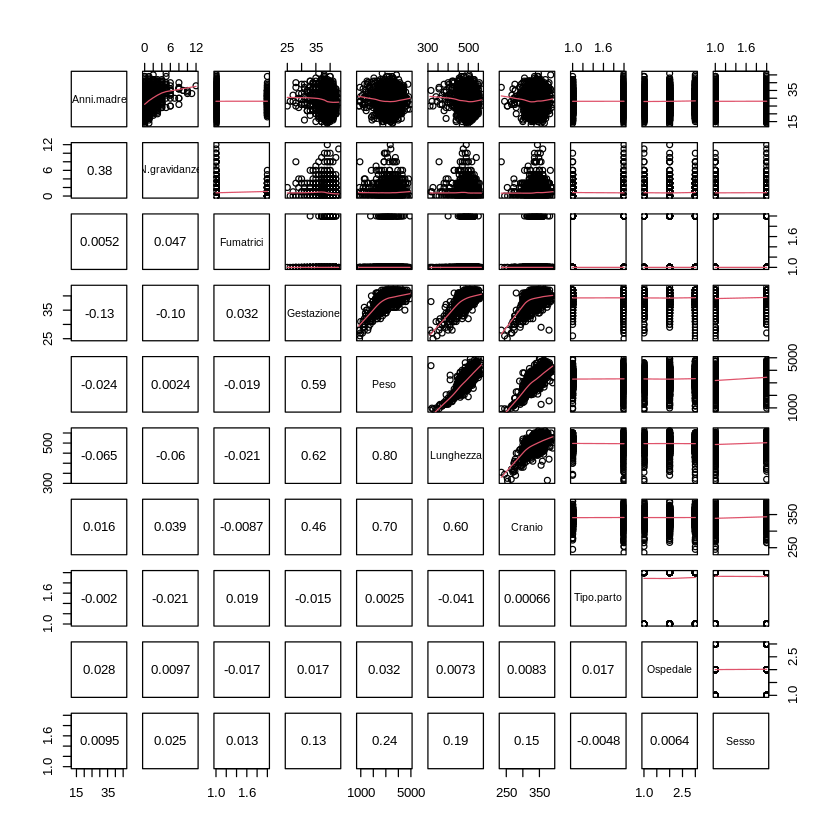

In [29]:
#let's now create a multiple linear regression model with all the dataset variables and see how good it is
dati_mod=dati[,1:10]
#created new dataframe = to the original (dropping the columns of variables divided in classes previously created)

panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
  par(usr = c(0, 1, 0, 1))
  r <- (cor(x, y))
  txt <- format(c(r, 0.123456789), digits = digits)[1]
  txt <- paste0(prefix, txt)
  if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
  text(0.5, 0.5, txt, cex = 1)
}

pairs(dati_mod,upper.panel=panel.smooth,lower.panel = panel.cor)
#correlation matrix: scorrelations described before are confrimed looking at the values:
#-high positive correlation among weight, length and skull dimensions
#-high positive correlation among the previous ones and gestation variable
#-correlation coefficients lose credibility if related to qualitative variables (sex,smoker/non smoker, birth type, hospital)
#-coefficients can give an idea, but surely better use boxplots and tests

In [32]:
#model 1
mod1=lm(Peso~.,data=dati_mod)
summary(mod1)
#significant positive correlation with gestation, length and skull dimension
#significant positive correlation with sex: the other variables being equal, it is registered an increase of 77g between female and male newborns
#R2 adjusted is 0.73: good, but it can be better


Call:
lm(formula = Peso ~ ., data = dati_mod)

Residuals:
    Min      1Q  Median      3Q     Max 
-1123.3  -181.2   -14.6   160.7  2612.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -6735.1677   141.3977 -47.633  < 2e-16 ***
Anni.madre        0.7983     1.1463   0.696   0.4862    
N.gravidanze     11.4118     4.6665   2.445   0.0145 *  
Fumatrici1      -30.1567    27.5396  -1.095   0.2736    
Gestazione       32.5265     3.8179   8.520  < 2e-16 ***
Lunghezza        10.2951     0.3007  34.237  < 2e-16 ***
Cranio           10.4725     0.4261  24.580  < 2e-16 ***
Tipo.partoNat    29.5027    12.0848   2.441   0.0147 *  
Ospedaleosp2    -11.2216    13.4388  -0.835   0.4038    
Ospedaleosp3     28.0984    13.4972   2.082   0.0375 *  
SessoM           77.5473    11.1779   6.938 5.07e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 273.9 on 2489 degrees of freedom
Multiple R-squared:  0.7289,	Adjus

In [33]:
#model 2
mod2=update(mod1, ~.-Ospedale)
summary(mod2)
anova(mod2,mod1)
BIC(mod2,mod1)
car::vif(mod2)
#without hospital, that has no correlation with response
#R2 adjusted not changed: good, it means hospital variable does not give any useful information to the model
#f test anova, through which the difference in explained variance between two models is analysed, gives a slightly low p-value, but the removal is still acceptable
#comparing the BIC, model 2 results being better
#from vif no multicollinearity is present


Call:
lm(formula = Peso ~ Anni.madre + N.gravidanze + Fumatrici + Gestazione + 
    Lunghezza + Cranio + Tipo.parto + Sesso, data = dati_mod)

Residuals:
     Min       1Q   Median       3Q      Max 
-1140.23  -181.78   -14.89   160.22  2630.40 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -6737.4886   141.4866 -47.619  < 2e-16 ***
Anni.madre        0.8647     1.1475   0.754   0.4512    
N.gravidanze     11.7148     4.6712   2.508   0.0122 *  
Fumatrici1      -31.5829    27.5739  -1.145   0.2522    
Gestazione       32.8391     3.8219   8.592  < 2e-16 ***
Lunghezza        10.2723     0.3010  34.129  < 2e-16 ***
Cranio           10.4844     0.4266  24.575  < 2e-16 ***
Tipo.partoNat    30.2562    12.0994   2.501   0.0125 *  
SessoM           78.0338    11.1925   6.972 3.99e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.3 on 2491 degrees of freedom
Multiple R-squared:  0.7279,	Adjusted R-sq

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2491,187459103,NA,NA,NA,NA
2,2489,186772707,2,686396.8,4.573585,0.01040778


,df,BIC
,<dbl>,<dbl>
mod2,10,35235.50
mod1,12,35241.97


Anni.madre N.gravidanze    Fumatrici   Gestazione    Lunghezza       Cranio 
    1.189243     1.188277     1.007034     1.693749     2.083844     1.630606 
  Tipo.parto        Sesso 
    1.003810     1.040370

In [34]:
#model 3
mod3=update(mod2, ~.-Tipo.parto)
summary(mod3)
anova(mod3,mod2)
BIC(mod3,mod2)
car::vif(mod3)
#R2 adjusted practically hasn't changed from model 2: good, it means birth type variable does not give any useful information to the model
#f test anova, through which the difference in explained variance between two models is analysed, gives a slightly low p-value, but the removal is still acceptable
#comparing the BIC, model 3 results being better
#from vif no multicollinearity is present


Call:
lm(formula = Peso ~ Anni.madre + N.gravidanze + Fumatrici + Gestazione + 
    Lunghezza + Cranio + Sesso, data = dati_mod)

Residuals:
     Min       1Q   Median       3Q      Max 
-1160.62  -181.17   -15.91   163.47  2631.35 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6711.5440   141.2543 -47.514  < 2e-16 ***
Anni.madre       0.8772     1.1487   0.764   0.4452    
N.gravidanze    11.4029     4.6745   2.439   0.0148 *  
Fumatrici1     -30.2865    27.5981  -1.097   0.2726    
Gestazione      32.8936     3.8259   8.598  < 2e-16 ***
Lunghezza       10.2348     0.3009  34.010  < 2e-16 ***
Cranio          10.5192     0.4268  24.644  < 2e-16 ***
SessoM          78.0898    11.2042   6.970 4.05e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.6 on 2492 degrees of freedom
Multiple R-squared:  0.7272,	Adjusted R-squared:  0.7264 
F-statistic:   949 on 7 and 2492 DF,  p-value: < 2.2e-16


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2492,187929681,NA,NA,NA,NA
2,2491,187459103,1,470577.7,6.253145,0.01246108


,df,BIC
,<dbl>,<dbl>
mod3,9,35233.94
mod2,10,35235.50


Anni.madre N.gravidanze    Fumatrici   Gestazione    Lunghezza       Cranio 
    1.189220     1.187430     1.006678     1.693694     2.078666     1.628877 
       Sesso 
    1.040366

In [35]:
mod4=update(mod3, ~.-Anni.madre)
summary(mod4)
anova(mod4,mod3)
BIC(mod4,mod3)
car::vif(mod4)
#R2 adjusted practically hasn't changed from model 3: good, it means mother's age variable does not give any useful information to the model
#f test anova, through which the difference in explained variance between two models is analysed, gives a high p-value, so the removal is correct
#comparing the BIC, model 4 results being better
#from vif no multicollinearity is present


Call:
lm(formula = Peso ~ N.gravidanze + Fumatrici + Gestazione + Lunghezza + 
    Cranio + Sesso, data = dati_mod)

Residuals:
    Min      1Q  Median      3Q     Max 
-1150.3  -181.3   -15.7   163.0  2636.3 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6681.6714   135.7178 -49.232  < 2e-16 ***
N.gravidanze    12.7185     4.3450   2.927  0.00345 ** 
Fumatrici1     -30.4634    27.5948  -1.104  0.26972    
Gestazione      32.5914     3.8051   8.565  < 2e-16 ***
Lunghezza       10.2341     0.3009  34.011  < 2e-16 ***
Cranio          10.5359     0.4262  24.718  < 2e-16 ***
SessoM          78.1713    11.2028   6.978 3.83e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.6 on 2493 degrees of freedom
Multiple R-squared:  0.7271,	Adjusted R-squared:  0.7265 
F-statistic:  1107 on 6 and 2493 DF,  p-value: < 2.2e-16


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2493,187973654,NA,NA,NA,NA
2,2492,187929681,1,43973.22,0.5830971,0.4451732


,df,BIC
,<dbl>,<dbl>
mod4,8,35226.70
mod3,9,35233.94


N.gravidanze    Fumatrici   Gestazione    Lunghezza       Cranio        Sesso 
    1.026120     1.006607     1.675575     2.078644     1.624603     1.040271

In [36]:
mod5=update(mod4, ~.-Fumatrici)
summary(mod5)
anova(mod5,mod4)
BIC(mod5,mod4)
car::vif(mod5)
#R2 adjusted practically hasn't changed from model 4: good, it means mother's age variable does not give any useful information to the model
#f test anova, through which the difference in explained variance between two models is analysed, gives a high p-value, so the removal is correct
#comparing the BIC, model 5 results being better
#from vif no multicollinearity is present


Call:
lm(formula = Peso ~ N.gravidanze + Gestazione + Lunghezza + Cranio + 
    Sesso, data = dati_mod)

Residuals:
     Min       1Q   Median       3Q      Max 
-1149.44  -180.81   -15.58   163.64  2639.72 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6681.1445   135.7229 -49.226  < 2e-16 ***
N.gravidanze    12.4750     4.3396   2.875  0.00408 ** 
Gestazione      32.3321     3.7980   8.513  < 2e-16 ***
Lunghezza       10.2486     0.3006  34.090  < 2e-16 ***
Cranio          10.5402     0.4262  24.728  < 2e-16 ***
SessoM          77.9927    11.2021   6.962 4.26e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.6 on 2494 degrees of freedom
Multiple R-squared:  0.727,	Adjusted R-squared:  0.7265 
F-statistic:  1328 on 5 and 2494 DF,  p-value: < 2.2e-16


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2494,188065546,NA,NA,NA,NA
2,2493,187973654,1,91891.97,1.218717,0.2697191


,df,BIC
,<dbl>,<dbl>
mod5,7,35220.1
mod4,8,35226.7


N.gravidanze   Gestazione    Lunghezza       Cranio        Sesso 
    1.023475     1.669189     2.074689     1.624465     1.040054

In [37]:
stepwise.mod=MASS::stepAIC(mod1,
                           direction="both",
                           k=log(n))
summary(stepwise.mod)
BIC(mod5,stepwise.mod)
#through function stepAIC the previous procedure is made automatically: th best model is model 5 (as already found)

Start:  AIC=28139.46
Peso ~ Anni.madre + N.gravidanze + Fumatrici + Gestazione + Lunghezza + 
    Cranio + Tipo.parto + Ospedale + Sesso

               Df Sum of Sq       RSS   AIC
- Anni.madre    1     36392 186809099 28132
- Fumatrici     1     89979 186862686 28133
- Ospedale      2    686397 187459103 28133
- Tipo.parto    1    447233 187219939 28138
- N.gravidanze  1    448762 187221469 28138
<none>                      186772707 28140
- Sesso         1   3611588 190384294 28180
- Gestazione    1   5446558 192219264 28204
- Cranio        1  45338051 232110758 28675
- Lunghezza     1  87959790 274732497 29096

Step:  AIC=28132.12
Peso ~ N.gravidanze + Fumatrici + Gestazione + Lunghezza + Cranio + 
    Tipo.parto + Ospedale + Sesso

               Df Sum of Sq       RSS   AIC
- Fumatrici     1     90897 186899996 28126
- Ospedale      2    692738 187501837 28126
- Tipo.parto    1    448222 187257321 28130
<none>                      186809099 28132
- N.gravidanze  1    633756 18744


Call:
lm(formula = Peso ~ N.gravidanze + Gestazione + Lunghezza + Cranio + 
    Sesso, data = dati_mod)

Residuals:
     Min       1Q   Median       3Q      Max 
-1149.44  -180.81   -15.58   163.64  2639.72 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6681.1445   135.7229 -49.226  < 2e-16 ***
N.gravidanze    12.4750     4.3396   2.875  0.00408 ** 
Gestazione      32.3321     3.7980   8.513  < 2e-16 ***
Lunghezza       10.2486     0.3006  34.090  < 2e-16 ***
Cranio          10.5402     0.4262  24.728  < 2e-16 ***
SessoM          77.9927    11.2021   6.962 4.26e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.6 on 2494 degrees of freedom
Multiple R-squared:  0.727,	Adjusted R-squared:  0.7265 
F-statistic:  1328 on 5 and 2494 DF,  p-value: < 2.2e-16


,df,BIC
,<dbl>,<dbl>
mod5,7,35220.1
stepwise.mod,7,35220.1


In [39]:
#Let's evaluate possible non linear effects...


#from correlation matrix a squared correlation between weight and gestation variables may exist
#model 6
mod6=update(mod5, ~.+I(Gestazione^2))
summary(mod6)
anova(mod6,mod5)
BIC(mod6,mod5)
car::vif(mod6)
#the model is worse than model 5: correlations got less significant 
#f test shows there's no significant advantage in adding a non linear relationship
#BIC parameter tells that model 5 is better
#vic shows a certain multicollinearity exists (present both gestation and gestation^2)


Call:
lm(formula = Peso ~ N.gravidanze + Gestazione + Lunghezza + Cranio + 
    Sesso + I(Gestazione^2), data = dati_mod)

Residuals:
     Min       1Q   Median       3Q      Max 
-1144.11  -181.17   -13.16   165.73  2662.56 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -4650.2268   898.1706  -5.177 2.43e-07 ***
N.gravidanze       12.5660     4.3361   2.898  0.00379 ** 
Gestazione        -81.0486    49.7127  -1.630  0.10316    
Lunghezza          10.3534     0.3039  34.074  < 2e-16 ***
Cranio             10.6363     0.4280  24.854  < 2e-16 ***
SessoM             75.7900    11.2340   6.747 1.88e-11 ***
I(Gestazione^2)     1.5136     0.6617   2.287  0.02226 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.4 on 2493 degrees of freedom
Multiple R-squared:  0.7276,	Adjusted R-squared:  0.7269 
F-statistic:  1110 on 6 and 2493 DF,  p-value: < 2.2e-16


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2493,187671672,NA,NA,NA,NA
2,2494,188065546,-1,-393874.6,5.232166,0.02225631


,df,BIC
,<dbl>,<dbl>
mod6,8,35222.68
mod5,7,35220.10


N.gravidanze      Gestazione       Lunghezza          Cranio           Sesso 
       1.023561      286.467389        2.123000        1.640266        1.047753 
I(Gestazione^2) 
     279.771503

In [40]:
#model 7
mod7=update(mod6, ~.-Gestazione)
summary(mod7)
anova(mod7,mod6)
BIC(mod7,mod6)
car::vif(mod7)
#dropping gestation variable the model gets better
#R2 adjusted doesn't change significantly
#f test shows there's no significant advantage in adding a non linear relationship
#BIC parameter tells that model 7 is better
#from vic no multicollinearity is present


Call:
lm(formula = Peso ~ N.gravidanze + Lunghezza + Cranio + Sesso + 
    I(Gestazione^2), data = dati_mod)

Residuals:
     Min       1Q   Median       3Q      Max 
-1146.87  -181.09   -15.12   165.40  2643.89 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -6.101e+03  1.235e+02 -49.380  < 2e-16 ***
N.gravidanze     1.255e+01  4.338e+00   2.894  0.00383 ** 
Lunghezza        1.026e+01  2.987e-01  34.358  < 2e-16 ***
Cranio           1.056e+01  4.255e-01  24.816  < 2e-16 ***
SessoM           7.733e+01  1.120e+01   6.906 6.32e-12 ***
I(Gestazione^2)  4.379e-01  5.053e-02   8.667  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.5 on 2494 degrees of freedom
Multiple R-squared:  0.7273,	Adjusted R-squared:  0.7267 
F-statistic:  1330 on 5 and 2494 DF,  p-value: < 2.2e-16


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2494,187871765,NA,NA,NA,NA
2,2493,187671672,1,200093.6,2.65801,0.1031559


,df,BIC
,<dbl>,<dbl>
mod7,7,35217.52
mod6,8,35222.68


N.gravidanze       Lunghezza          Cranio           Sesso I(Gestazione^2) 
       1.023558        2.049668        1.620750        1.040354        1.630173

In [41]:
#model 8
mod8=update(mod7, ~.+Anni.madre*Fumatrici-Anni.madre-Fumatrici)
summary(mod8)
anova(mod8,mod7)
BIC(mod8,mod7)
car::vif(mod8)
#last try: a joint contribution of mother's age and her habit to smoke:
#the model gets worse: R2 remains the same, but the significance with response becomes lighter


Call:
lm(formula = Peso ~ N.gravidanze + Lunghezza + Cranio + Sesso + 
    I(Gestazione^2) + Anni.madre:Fumatrici, data = dati_mod)

Residuals:
     Min       1Q   Median       3Q      Max 
-1159.00  -180.72   -14.63   163.10  2634.89 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -6.123e+03  1.277e+02 -47.969  < 2e-16 ***
N.gravidanze           1.140e+01  4.672e+00   2.441   0.0147 *  
Lunghezza              1.025e+01  2.990e-01  34.269  < 2e-16 ***
Cranio                 1.054e+01  4.261e-01  24.736  < 2e-16 ***
SessoM                 7.739e+01  1.120e+01   6.910 6.14e-12 ***
I(Gestazione^2)        4.456e-01  5.091e-02   8.751  < 2e-16 ***
Anni.madre:Fumatrici0  9.625e-01  1.149e+00   0.838   0.4022    
Anni.madre:Fumatrici1 -4.313e-02  1.474e+00  -0.029   0.9767    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 274.5 on 2492 degrees of freedom
Multiple R-squared:  0.7275,	Adjusted

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2492,187739464,NA,NA,NA,NA
2,2494,187871765,-2,-132301.2,0.8780644,0.4157151


,df,BIC
,<dbl>,<dbl>
mod8,9,35231.41
mod7,7,35217.52


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



,GVIF,Df,GVIF^(1/(2*Df))
N.gravidanze,1.187193,1,1.089584
Lunghezza,2.054417,1,1.433324
Cranio,1.624982,1,1.274748
Sesso,1.040634,1,1.020115
I(Gestazione^2),1.654975,1,1.286458
Anni.madre:Fumatrici,1.197700,2,1.046133


In [42]:
BIC(mod7,mod5)
#the best models are 5 and 7: it is always preferable to keep a simpler model, so the choice would be in favour of model 5
#(R2adj: Radj_mod7=0.7267; Radj_mod5=0.7265: negligible improvement with a more complex model, no practical gain)

,df,BIC
,<dbl>,<dbl>
mod7,7,35217.52
mod5,7,35220.10



	Shapiro-Wilk normality test

data:  residuals(mod5)
W = 0.97408, p-value < 2.2e-16


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	studentized Breusch-Pagan test

data:  mod5
BP = 90.253, df = 5, p-value < 2.2e-16



	Durbin-Watson test

data:  mod5
DW = 1.9535, p-value = 0.1224
alternative hypothesis: true autocorrelation is greater than 0


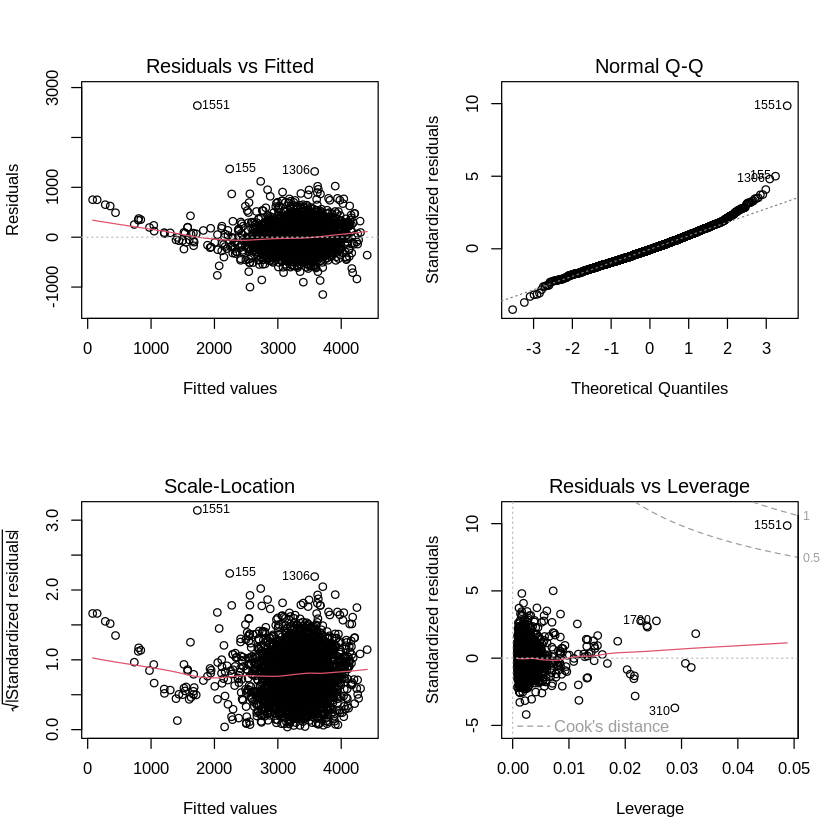

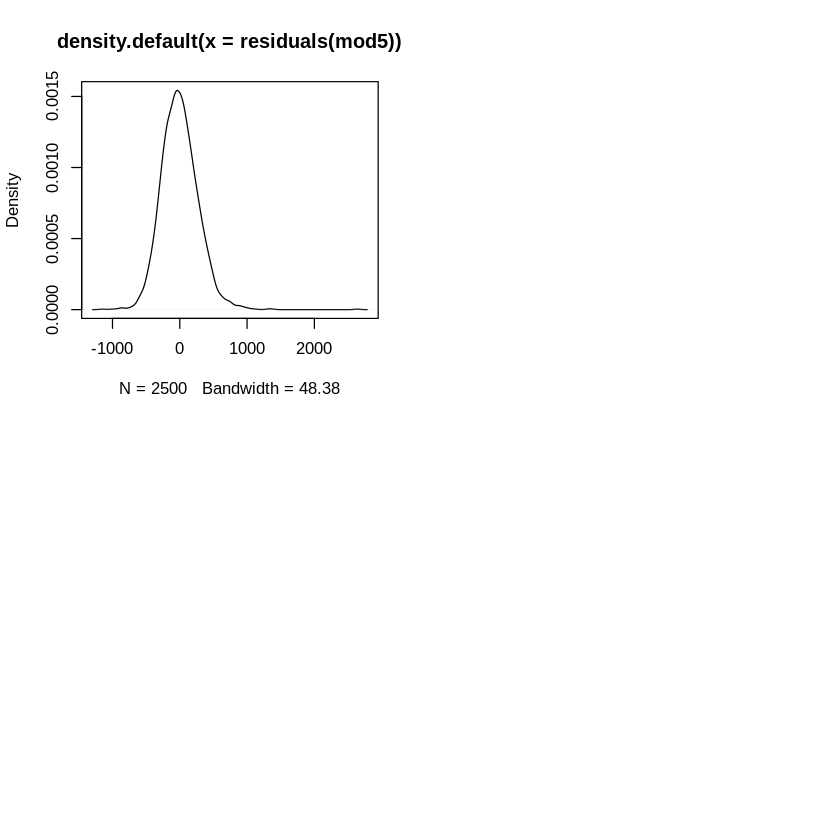

In [44]:
#let's finally proceed with the residuals' diagnostics


par(mfrow=c(2,2))
plot(mod5)
#starting from a response variable that does not distribute normally we expect:
#1-the shapiro test confirming the non normality (the residuals don't lie well on the bisector, particularly far from the origin) - image 1
#2-the bp test confirming the non homoskedasticity (residuals do not create a cloud around 0) - image 2
#3-the dw test confirming the autocorrelation (the cloud shows a strange tail on the left) - image 3
#moreover, there's an observation (1551) that is beyond Cook's distance of 0.5 and scarily near 1. It is probably an outlier highly significant - image 4

shapiro.test(residuals(mod5))
plot(density(residuals(mod5)))
install.packages("lmtest")
library(lmtest)
lmtest::bptest(mod5)
lmtest::dwtest(mod5)
#the tests confirm our hypothesis

13          15          34          67          89          96 
0.005630918 0.007050422 0.006744143 0.005891590 0.012816470 0.005351586 
        101         106         131         134         151         155 
0.007526751 0.014479871 0.007229339 0.007552819 0.010883937 0.007207682 
        161         189         190         204         205         206 
0.020335483 0.004893297 0.005366557 0.014490604 0.005351634 0.009476652 
        220         294         305         310         312         315 
0.007393997 0.005912765 0.005442061 0.028812123 0.013169272 0.005385800 
        378         440         442         445         486         492 
0.015934061 0.005404736 0.007723662 0.007509382 0.005164446 0.008274018 
        497         516         582         587         592         614 
0.005166306 0.013079851 0.011665555 0.008412325 0.006384116 0.005299262 
        638         656         657         684         697         702 
0.006688287 0.005927777 0.005322685 0.008818987 0.005863826 0.005202259 
        729         748         750         757         765         805 
0.005023115 0.008565543 0.006942097 0.008145491 0.006070298 0.014356657 
        828         893         895         913         928         946 
0.007179817 0.005075205 0.005295896 0.005571144 0.022742332 0.006909044 
        947         956         985        1008        1014        1049 
0.008409465 0.007784123 0.007039416 0.005343037 0.008470133 0.004956169 
       1067        1091        1106        1130        1166        1181 
0.008465430 0.008933360 0.005967317 0.031728597 0.005513559 0.005677676 
       1188        1200        1219        1238        1248        1273 
0.006477203 0.005492370 0.030694311 0.005908078 0.014622914 0.007085831 
       1291        1293        1311        1321        1325        1356 
0.006117497 0.006073639 0.009625908 0.009293111 0.004857169 0.005303442 
       1357        1385        1395        1400        1402        1411 
0.006965051 0.012636943 0.005126697 0.005925069 0.004811441 0.008048184 
       1420        1428        1429        1450        1505        1551 
0.005155654 0.008192811 0.021757172 0.015104831 0.013330439 0.048769569 
       1553        1556        1573        1593        1606        1610 
0.008504889 0.005919673 0.005047204 0.005623758 0.005001812 0.008722184 
       1617        1619        1628        1686        1693        1701 
0.004866796 0.015067498 0.005069731 0.009349313 0.005077858 0.010842957 
       1712        1718        1727        1735        1780        1781 
0.006992084 0.006958857 0.013300523 0.004884846 0.025538678 0.016832361 
       1809        1827        1868        1892        1962        1967 
0.008707504 0.006065698 0.005205637 0.005332812 0.005540442 0.005337356 
       1977        2037        2040        2046        2086        2089 
0.006927281 0.004889127 0.011494872 0.005471670 0.013193090 0.006293550 
       2098        2114        2115        2120        2140        2146 
0.005094455 0.013316875 0.011772090 0.018659995 0.006244232 0.005802168 
       2148        2149        2157        2175        2200        2215 
0.007926839 0.013583436 0.005907225 0.032527273 0.011670024 0.004892265 
       2216        2220        2221        2224        2225        2244 
0.008117864 0.005414040 0.021628717 0.005838076 0.005591261 0.006929217 
       2257        2307        2317        2318        2337        2359 
0.006170254 0.013965608 0.007673614 0.004831118 0.005230450 0.010067364 
       2408        2422        2436        2437        2452        2458 
0.009696691 0.021532808 0.004986522 0.023943328 0.023838489 0.008506087 
       2471        2478 
0.020903740 0.005775173

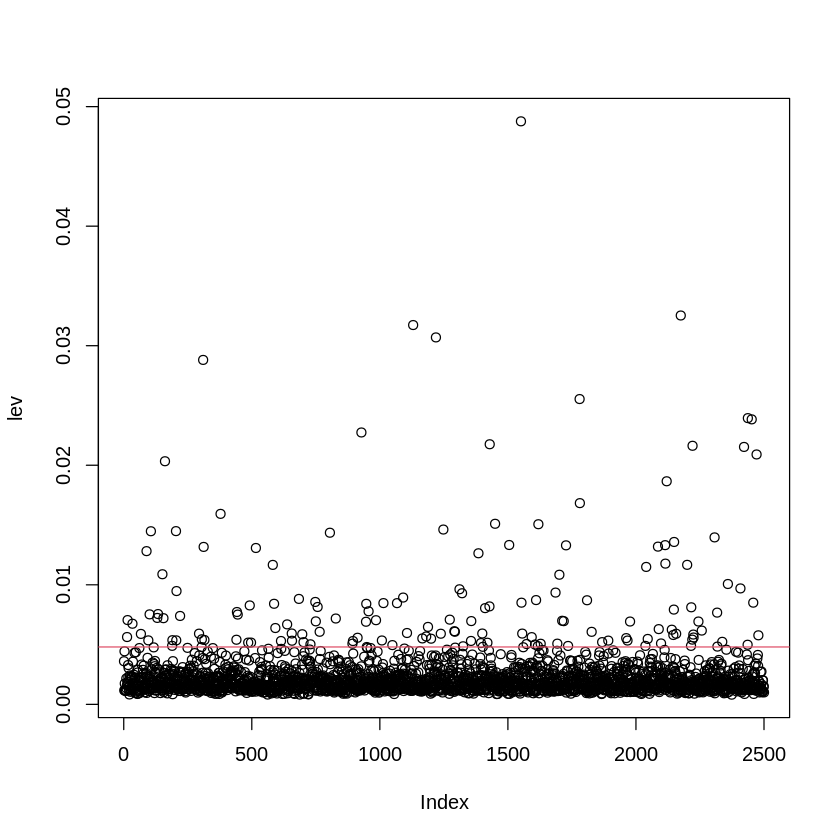

      rstudent unadjusted p-value Bonferroni p
1551 10.051908         2.4906e-23   6.2265e-20
155   5.027798         5.3138e-07   1.3285e-03
1306  4.827238         1.4681e-06   3.6702e-03

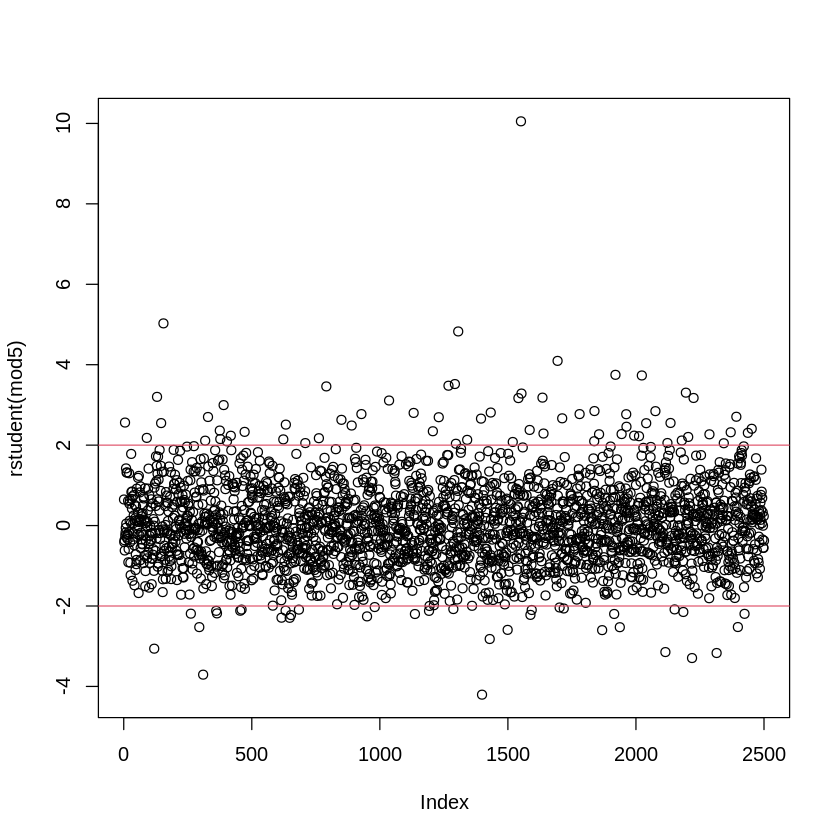

[1] 0.8300965

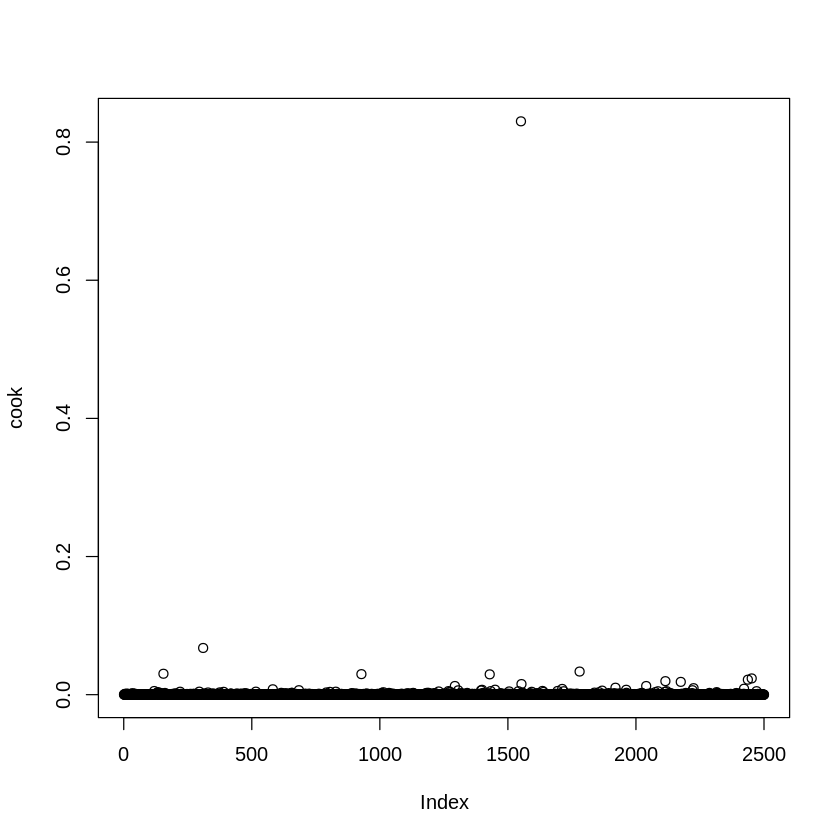

In [45]:
#leverage and outlier analysis

par(mfrow=c(1,1))
lev=hatvalues(mod5)
plot(lev)
p=sum(lev)
soglia=2*p/n
abline(h=soglia, col=2)
lev[lev>soglia]
#there are several leverage residuals beyond the threshold (particularly 1551)
plot(rstudent(mod5))
abline(h=c(-2,2),col=2)
car::outlierTest((mod5))
#from test on outliers 3 observations result being far from points' cloud

cook=cooks.distance((mod5))
plot(cook)
max(cook)
#maximum distance corresponds to observation 1551: very influent on regression model

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
lm(formula = ((Peso^lambda - 1)/lambda) ~ ., data = dati_mod)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.131  -4.476  -0.125   4.104  66.727 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -122.93697    3.54077 -34.720  < 2e-16 ***
Anni.madre       0.01706    0.02871   0.594   0.5523    
N.gravidanze     0.29599    0.11685   2.533   0.0114 *  
Fumatrici1      -0.66368    0.68962  -0.962   0.3359    
Gestazione       1.09792    0.09560  11.484  < 2e-16 ***
Lunghezza        0.27179    0.00753  36.095  < 2e-16 ***
Cranio           0.27312    0.01067  25.600  < 2e-16 ***
Tipo.partoNat    0.66565    0.30262   2.200   0.0279 *  
Ospedaleosp2    -0.26242    0.33652  -0.780   0.4356    
Ospedaleosp3     0.73710    0.33799   2.181   0.0293 *  
SessoM           1.77569    0.27991   6.344 2.65e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.86 on 2489 degrees of freedom
Multiple R-sq

Start:  AIC=9703.29
((Peso^lambda - 1)/lambda) ~ Anni.madre + N.gravidanze + Fumatrici + 
    Gestazione + Lunghezza + Cranio + Tipo.parto + Ospedale + 
    Sesso

               Df Sum of Sq    RSS     AIC
- Anni.madre    1        17 117135  9695.8
- Fumatrici     1        44 117162  9696.4
- Ospedale      2       449 117567  9697.2
- Tipo.parto    1       228 117346  9700.3
- N.gravidanze  1       302 117420  9701.9
<none>                      117118  9703.3
- Sesso         1      1894 119012  9735.6
- Gestazione    1      6206 123324  9824.5
- Cranio        1     30837 147955 10279.8
- Lunghezza     1     61305 178423 10747.9

Step:  AIC=9695.82
((Peso^lambda - 1)/lambda) ~ N.gravidanze + Fumatrici + Gestazione + 
    Lunghezza + Cranio + Tipo.parto + Ospedale + Sesso

               Df Sum of Sq    RSS     AIC
- Fumatrici     1        44 117179  9688.9
- Ospedale      2       453 117587  9689.8
- Tipo.parto    1       228 117363  9692.9
<none>                      117135  9695.8
- 


Call:
lm(formula = ((Peso^lambda - 1)/lambda) ~ N.gravidanze + Gestazione + 
    Lunghezza + Cranio + Sesso, data = dati_mod)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.570  -4.498  -0.182   4.199  67.394 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.217e+02  3.398e+00 -35.827  < 2e-16 ***
N.gravidanze  3.197e-01  1.086e-01   2.943  0.00328 ** 
Gestazione    1.095e+00  9.508e-02  11.515  < 2e-16 ***
Lunghezza     2.707e-01  7.526e-03  35.963  < 2e-16 ***
Cranio        2.747e-01  1.067e-02  25.738  < 2e-16 ***
SessoM        1.787e+00  2.804e-01   6.372 2.21e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.875 on 2494 degrees of freedom
Multiple R-squared:  0.7549,	Adjusted R-squared:  0.7544 
F-statistic:  1536 on 5 and 2494 DF,  p-value: < 2.2e-16


,df,BIC
,<dbl>,<dbl>
bc_stepwise.mod,7,16782.78
mod5,7,35220.10


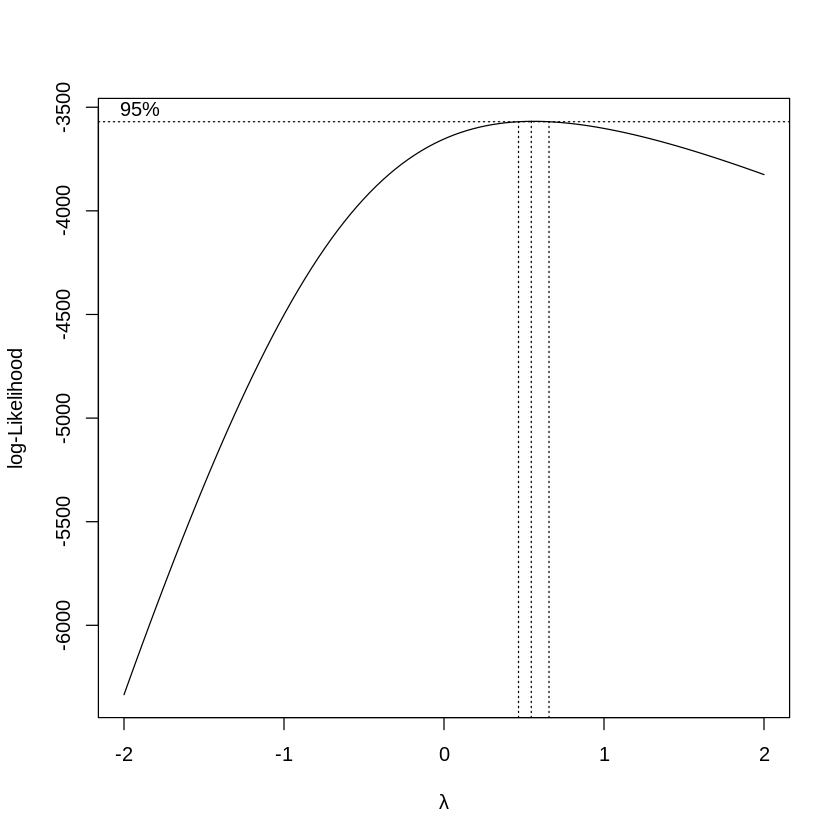


	Shapiro-Wilk normality test

data:  residuals(bc_stepwise.mod)
W = 0.97559, p-value < 2.2e-16



	studentized Breusch-Pagan test

data:  bc_stepwise.mod
BP = 104.97, df = 5, p-value < 2.2e-16



	Durbin-Watson test

data:  bc_stepwise.mod
DW = 1.9478, p-value = 0.09565
alternative hypothesis: true autocorrelation is greater than 0


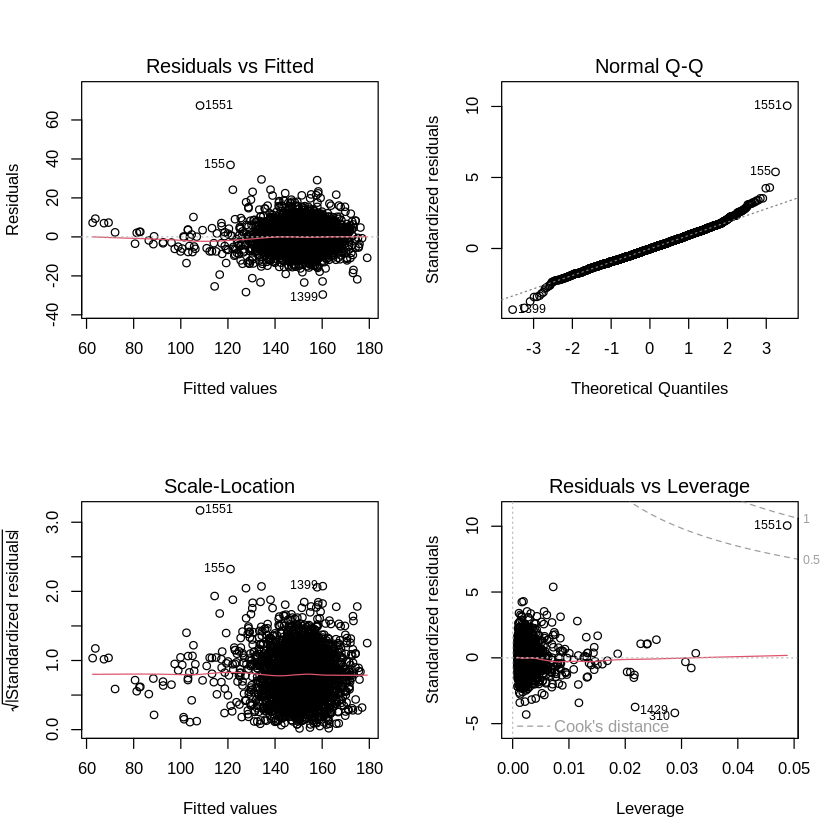

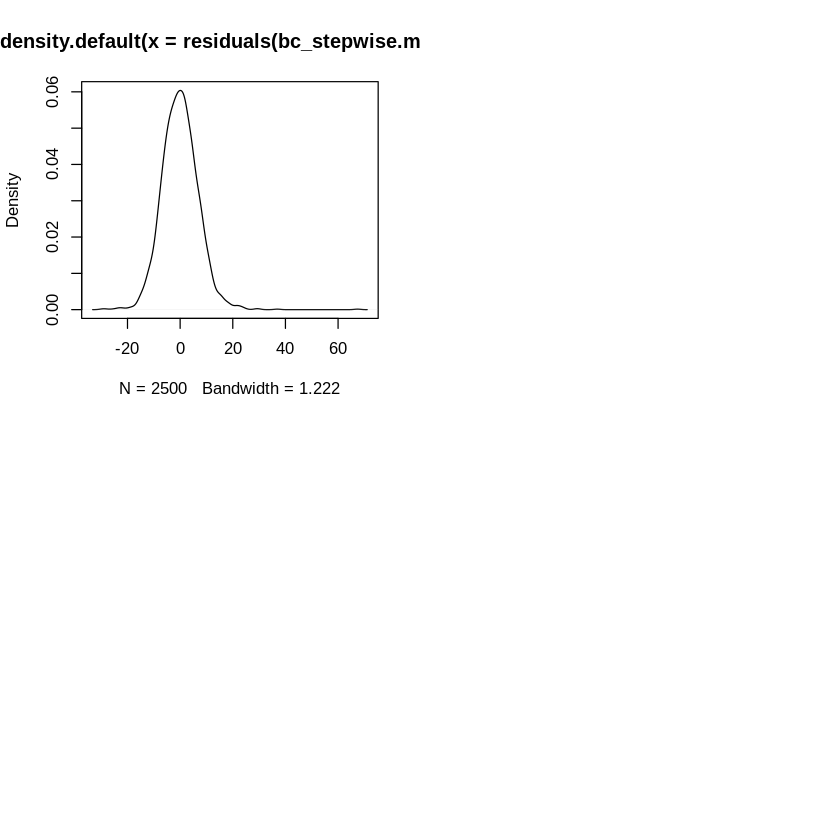

13          15          34          67          89          96 
0.005630918 0.007050422 0.006744143 0.005891590 0.012816470 0.005351586 
        101         106         131         134         151         155 
0.007526751 0.014479871 0.007229339 0.007552819 0.010883937 0.007207682 
        161         189         190         204         205         206 
0.020335483 0.004893297 0.005366557 0.014490604 0.005351634 0.009476652 
        220         294         305         310         312         315 
0.007393997 0.005912765 0.005442061 0.028812123 0.013169272 0.005385800 
        378         440         442         445         486         492 
0.015934061 0.005404736 0.007723662 0.007509382 0.005164446 0.008274018 
        497         516         582         587         592         614 
0.005166306 0.013079851 0.011665555 0.008412325 0.006384116 0.005299262 
        638         656         657         684         697         702 
0.006688287 0.005927777 0.005322685 0.008818987 0.005863826 0.005202259 
        729         748         750         757         765         805 
0.005023115 0.008565543 0.006942097 0.008145491 0.006070298 0.014356657 
        828         893         895         913         928         946 
0.007179817 0.005075205 0.005295896 0.005571144 0.022742332 0.006909044 
        947         956         985        1008        1014        1049 
0.008409465 0.007784123 0.007039416 0.005343037 0.008470133 0.004956169 
       1067        1091        1106        1130        1166        1181 
0.008465430 0.008933360 0.005967317 0.031728597 0.005513559 0.005677676 
       1188        1200        1219        1238        1248        1273 
0.006477203 0.005492370 0.030694311 0.005908078 0.014622914 0.007085831 
       1291        1293        1311        1321        1325        1356 
0.006117497 0.006073639 0.009625908 0.009293111 0.004857169 0.005303442 
       1357        1385        1395        1400        1402        1411 
0.006965051 0.012636943 0.005126697 0.005925069 0.004811441 0.008048184 
       1420        1428        1429        1450        1505        1551 
0.005155654 0.008192811 0.021757172 0.015104831 0.013330439 0.048769569 
       1553        1556        1573        1593        1606        1610 
0.008504889 0.005919673 0.005047204 0.005623758 0.005001812 0.008722184 
       1617        1619        1628        1686        1693        1701 
0.004866796 0.015067498 0.005069731 0.009349313 0.005077858 0.010842957 
       1712        1718        1727        1735        1780        1781 
0.006992084 0.006958857 0.013300523 0.004884846 0.025538678 0.016832361 
       1809        1827        1868        1892        1962        1967 
0.008707504 0.006065698 0.005205637 0.005332812 0.005540442 0.005337356 
       1977        2037        2040        2046        2086        2089 
0.006927281 0.004889127 0.011494872 0.005471670 0.013193090 0.006293550 
       2098        2114        2115        2120        2140        2146 
0.005094455 0.013316875 0.011772090 0.018659995 0.006244232 0.005802168 
       2148        2149        2157        2175        2200        2215 
0.007926839 0.013583436 0.005907225 0.032527273 0.011670024 0.004892265 
       2216        2220        2221        2224        2225        2244 
0.008117864 0.005414040 0.021628717 0.005838076 0.005591261 0.006929217 
       2257        2307        2317        2318        2337        2359 
0.006170254 0.013965608 0.007673614 0.004831118 0.005230450 0.010067364 
       2408        2422        2436        2437        2452        2458 
0.009696691 0.021532808 0.004986522 0.023943328 0.023838489 0.008506087 
       2471        2478 
0.020903740 0.005775173

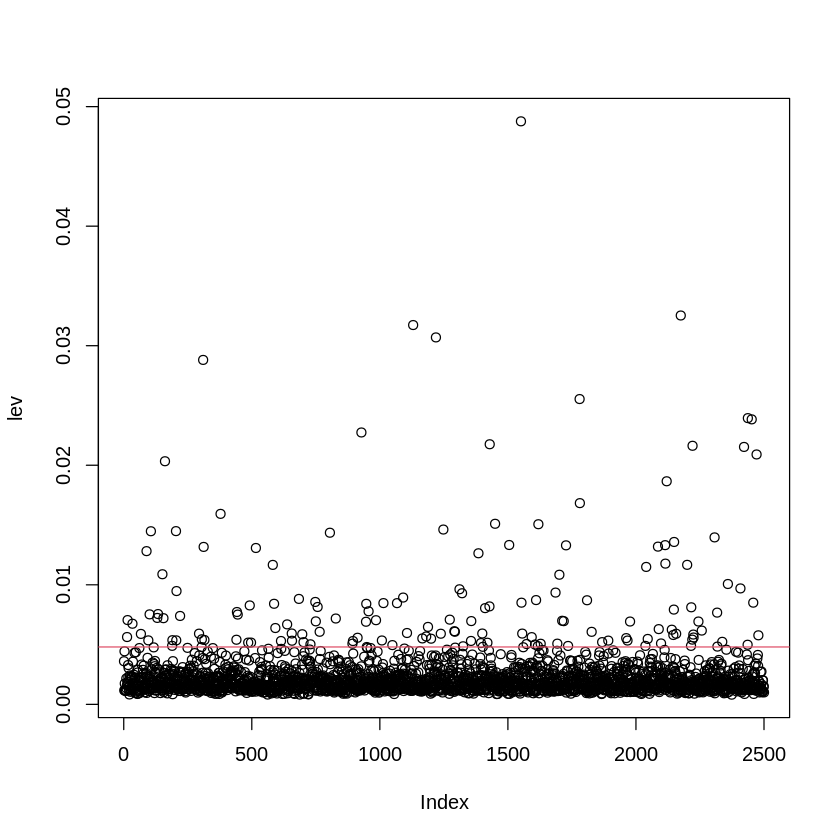

      rstudent unadjusted p-value Bonferroni p
1551 10.259166         3.2372e-24   8.0929e-21
155   5.422018         6.4594e-08   1.6149e-04
1399 -4.321565         1.6100e-05   4.0251e-02
1694  4.306978         1.7191e-05   4.2976e-02

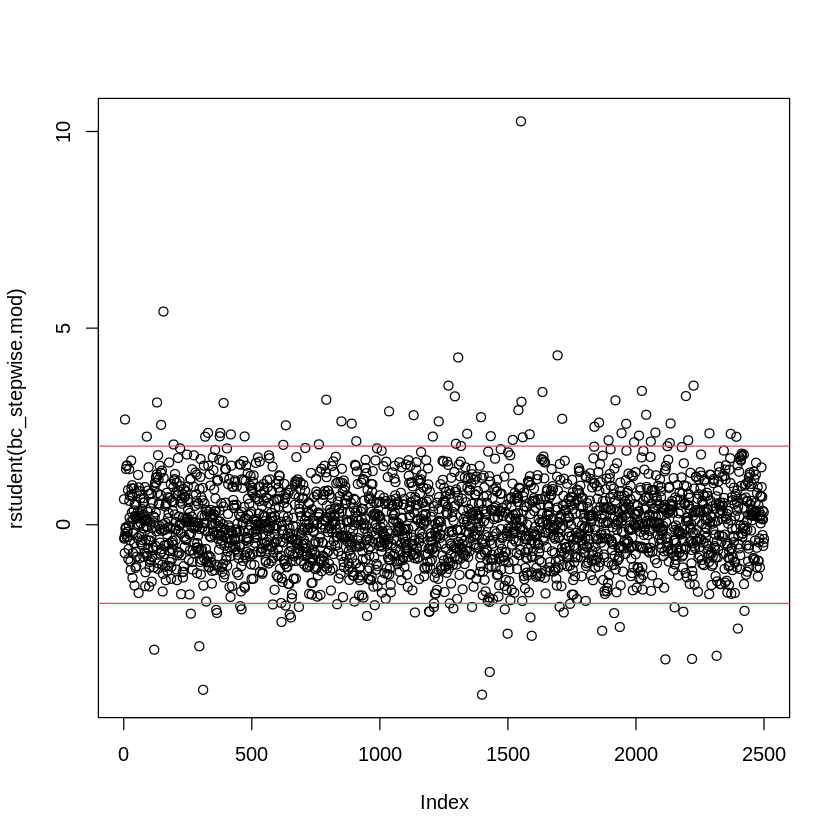

[1] 0.8632797

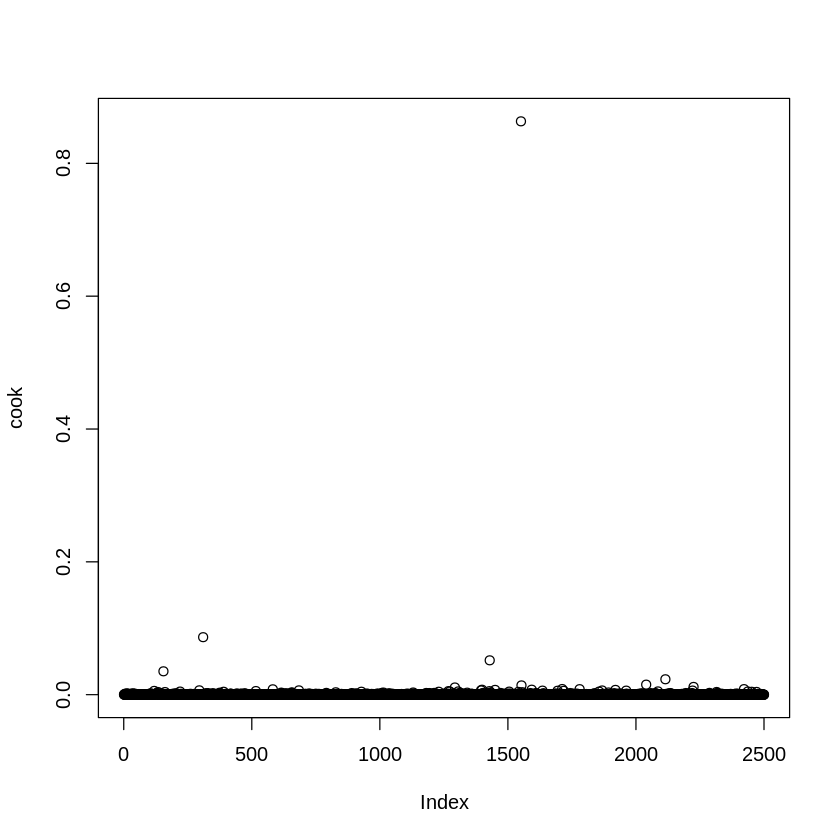

In [46]:
#Conclusions: how good is the regression model?

#from the previous considerations we can conclude that the model can't be so good:
#R2 adjusted is quite decent, but we started from a variable that does not distribute normally
#this has repercussions on the erratic part and consequently on residuals, in fact they do not pass the previous tests
#morevoer there are outliers, significant on the model itself


#let's try a boxcox transformation to improve the model
install.packages("MASS")
library(MASS)

bc=boxcox(Peso~.,data=dati_mod)
lambda=bc$x[which.max(bc$y)]
bc_mod=lm(((Peso^lambda-1)/lambda)~.,data=dati_mod)
summary(bc_mod)
bc_stepwise.mod=MASS::stepAIC(bc_mod,
                           direction="both",
                           k=log(n))
summary(bc_stepwise.mod)

BIC(bc_stepwise.mod,mod5)
#R2 adjusted is significantly improved and BIC shows this new model is better than model 5 
par(mfrow=c(2,2))
plot(bc_stepwise.mod)
shapiro.test(residuals(bc_stepwise.mod))
plot(density(residuals(bc_stepwise.mod)))
lmtest::bptest(bc_stepwise.mod)
lmtest::dwtest(bc_stepwise.mod)
par(mfrow=c(1,1))
lev=hatvalues(bc_stepwise.mod)
plot(lev)
p=sum(lev)
soglia=2*p/n
abline(h=soglia, col=2)
lev[lev>soglia]
plot(rstudent(bc_stepwise.mod))
abline(h=c(-2,2),col=2)
car::outlierTest((bc_stepwise.mod))
cook=cooks.distance((bc_stepwise.mod))
plot(cook)
max(cook)
#even if the model is better the residuals analysis shows the same problems seen before

In [47]:
#let's still use the model to make a prediction about a female newborn for a mother that already had two pregnancies and will give birth 39 weeks. No other infos about the baby...


predict(mod5,newdata = data.frame(Gestazione=39,Sesso="F",N.gravidanze=3,Anni.madre=mean(Anni.madre),Lunghezza=mean(Lunghezza),Cranio=mean(Cranio)))
#for the unknown variables the mean values are used

1 
3271.09

In [49]:
#let's show the best graphic representation of the model



#it's not possible to make a representation beyond the third dimension (a plane in space):
#so knowing that, in model 5, the weight variable depends on 5 variables we could represent it depending on two variables + 1 qualitative variable to split on two planes and make comparisons
install.packages("rgl")
library(rgl)
install.packages("car")
library(car)
scatter3d(Peso~Gestazione+N.gravidanze, groups=Sesso)
#used scatterplot3d: weight as dependent variable, gestation and n° of pregnancies as indipendent variables + sex as control variable
scatter3d(Peso~Gestazione+Cranio, groups=Sesso)
#used scatterplot3d: weight as dependent variable, gestation and skull dimension as indipendent variables + sex as control variable

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

